In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import shutil
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading packages

In [3]:
import sys
from pathlib import Path

here_path = Path().resolve()
repo_path = here_path.parents[1]
sys.path.append(str(repo_path))

In [4]:
from py.utils import verifyDir, verifyFile, verifyType

In [5]:
from py.config import Config

cfg = Config()

np.random.seed(cfg.RANDOM_STATE)
cfg.DATA_PATH, cfg.MODEL_PATH

('/media/felipe/DATA19/datasets/', '/media/felipe/DATA19/models/')

In [6]:
QSCORE_PATH=f"{cfg.DATA_PATH}pp2/Qscores/"
IMAGES_PATH = f"{cfg.DATA_PATH}pp2/images/"
COMPARISONS_PATH=f"{cfg.DATA_PATH}pp2/comparisons/"

### Loading data

In [7]:
data_df = pd.read_csv(f"{QSCORE_PATH}scores.csv", sep=";", low_memory=False)
data_df

image_id        lat        long       city country  \
0       50e5f7d4d7c3df413b00056a  22.310524  114.170637  Hong Kong   China   
1       50e5f7d4d7c3df413b00056b  22.274799  114.192828  Hong Kong   China   
2       50e5f7d4d7c3df413b00056c  22.291117  114.147373  Hong Kong   China   
3       50e5f7d4d7c3df413b00056d  22.314273  114.177176  Hong Kong   China   
4       50e5f7d4d7c3df413b00056e  22.332412  114.204790  Hong Kong   China   
...                          ...        ...         ...        ...     ...   
108433  5185d533fdc9f03fd500148d  45.635489  -73.514755   Montreal  Canada   
108434  5185d533fdc9f03fd500148e  45.581265  -73.511511   Montreal  Canada   
108435  5185d534fdc9f03fd500148f  45.591299  -73.520681   Montreal  Canada   
108436  5185d534fdc9f03fd5001490  45.470656  -73.631901   Montreal  Canada   
108437  5185d536fdc9f03fd5001491  45.626787  -73.547511   Montreal  Canada   

            continent    safety  beautiful   wealthy    lively    boring  \
0                Asia  4.135536   1.574074  2.962963  4.199346  5.000000   
1                Asia  3.560981   2.229437  5.277778  5.662393  7.777778   
2                Asia  4.514946   3.333333  3.333333  4.746693  3.611111   
3                Asia  4.852448   3.333333  5.083333  3.333333  8.333333   
4                Asia  4.975207   2.129630  3.680556  4.343857  2.500000   
...               ...       ...        ...       ...       ...       ...   
108433  North America  6.111111   5.833333  2.333333  3.495058  3.333333   
108434  North America  4.797811   3.251984  2.777778  2.148291  7.222222   
108435  North America  5.006830   6.888889  7.777778  6.176471  5.833333   
108436  North America  4.551622   3.333333  5.000000  5.008547  3.611111   
108437  North America  4.666846   2.833333  3.333333  4.376984  3.666667   

        depressing                              image_path  
0         0.000000  Hong Kong/50e5f7d4d7c3df413b00056a.JPG  
1         3.333333  Hong Kong/50e5f7d4d7c3df413b00056b.JPG  
2         0.000000  Hong Kong/50e5f7d4d7c3df413b00056c.JPG  
3         3.327381  Hong Kong/50e5f7d4d7c3df413b00056d.JPG  
4         4.444444  Hong Kong/50e5f7d4d7c3df413b00056e.JPG  
...            ...                                     ...  
108433    9.166667   Montreal/5185d533fdc9f03fd500148d.JPG  
108434    7.777778   Montreal/5185d533fdc9f03fd500148e.JPG  
108435    2.611111   Montreal/5185d534fdc9f03fd500148f.JPG  
108436    2.962963   Montreal/5185d534fdc9f03fd5001490.JPG  
108437    5.777778   Montreal/5185d536fdc9f03fd5001491.JPG  

[108438 rows x 13 columns]

In [8]:
metrics = ["safety", "beautiful", "wealthy", "lively", "boring", "depressing"]

In [9]:
cities = data_df["city"].unique().tolist()

### Visualizing data

#### Correlation matrix

In [10]:
correlation_matrix = data_df.loc[:, metrics].corr()
correlation_matrix

safety  beautiful   wealthy    lively    boring  depressing
safety      1.000000   0.211484  0.201239  0.173714 -0.081153   -0.149016
beautiful   0.211484   1.000000  0.181221  0.129531 -0.076937   -0.157848
wealthy     0.201239   0.181221  1.000000  0.151903 -0.070815   -0.131113
lively      0.173714   0.129531  0.151903  1.000000 -0.100792   -0.107941
boring     -0.081153  -0.076937 -0.070815 -0.100792  1.000000    0.060564
depressing -0.149016  -0.157848 -0.131113 -0.107941  0.060564    1.000000

In [11]:
# confusion_matrix = pd.crosstab(data_df['annotations'], data_df['crimetype'], rownames=['annotations'], colnames=['crimetype'])

cmap=sns.diverging_palette(130, 700, s=100, as_cmap=True)
cmap="RdBu"

plt.figure(figsize=(20, 16))
sns_heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap, center=0, vmin=-1, vmax=1, cbar=True, annot_kws={"size": 35})

# Customize the plot
sns_heatmap.set_title('Correlation Matrix', fontsize=0)
sns_heatmap.set_xlabel('Crime type', fontsize=0, rotation=0)
sns_heatmap.set_ylabel('Annotations', fontsize=0)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Display the plot
plt.show()

#### Number of images per city

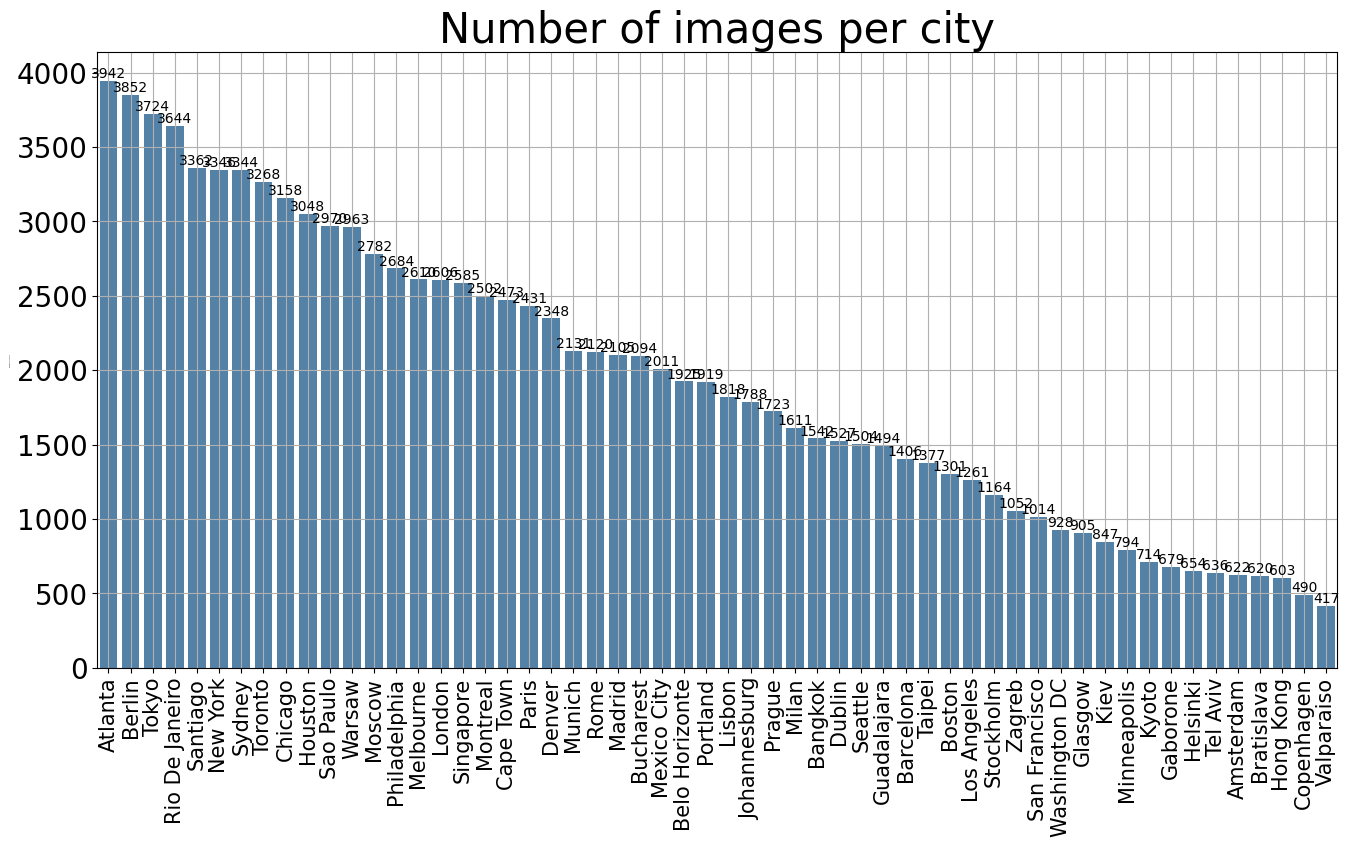

In [12]:
city_df = data_df["city"].value_counts().reset_index().copy()
city_df.rename(columns={"index": "city", "city": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=city_df,
            x=city_df.columns[0],
            y=city_df.columns[1],
            ax=ax,
            color="steelblue",
            order=city_df.sort_values(city_df.columns[1], ascending=False)[city_df.columns[0]]
           )

sns_fig.set_title(f"Number of images per city", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_images_per_country.png')
plt.show()

#### Number of images per country

In [13]:
country_df = data_df["country"].value_counts().reset_index().copy()
country_df.rename(columns={"index": "country", "country": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=country_df,
            x=country_df.columns[0],
            y=country_df.columns[1],
            ax=ax,
            color="steelblue",
            order=country_df.sort_values(country_df.columns[1], ascending=False)[country_df.columns[0]]
           )

sns_fig.set_title(f"Number of images per country", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_images_per_country.png')
plt.show()

#### Number of cities per country

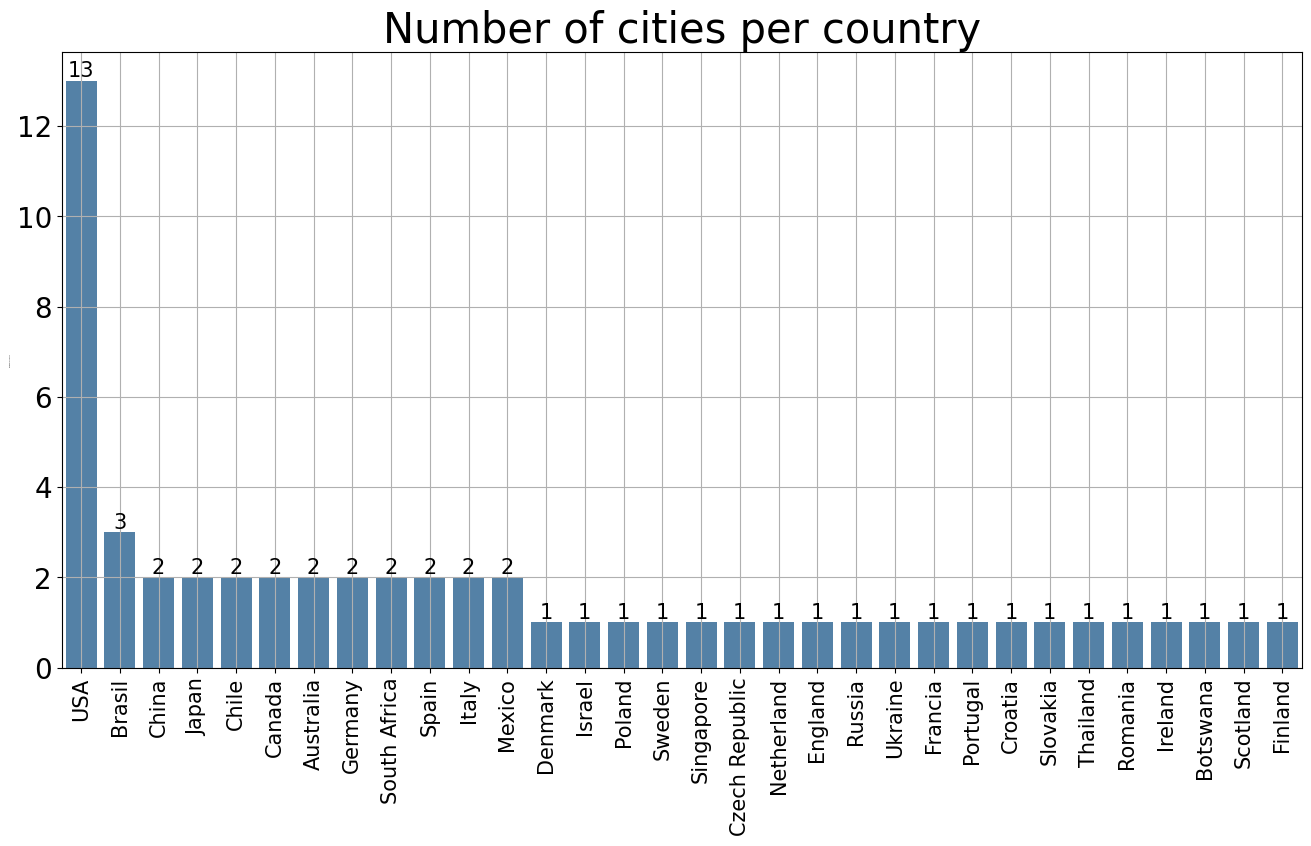

In [14]:
cc_df = data_df[["country", "city"]].drop_duplicates()["country"].value_counts().reset_index()
# cc_df.rename(columns={"index": "continent", "continent": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=cc_df,
            x=cc_df.columns[0],
            y=cc_df.columns[1],
            ax=ax,
            color="steelblue",
            order=cc_df.sort_values(cc_df.columns[1], ascending=False)[cc_df.columns[0]]
           )

sns_fig.set_title(f"Number of cities per country", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_cities_per_continent.png')
plt.show()

#### Number of images per continent

In [15]:
continent_df = data_df["continent"].value_counts().reset_index().copy()
continent_df.rename(columns={"index": "continent", "continent": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=continent_df,
            x=continent_df.columns[0],
            y=continent_df.columns[1],
            ax=ax,
            color="steelblue",
            order=continent_df.sort_values(continent_df.columns[1], ascending=False)[continent_df.columns[0]]
           )

sns_fig.set_title(f"Number of images per continent", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_cities_per_continent.png')
plt.show()

#### Number of countries per continent

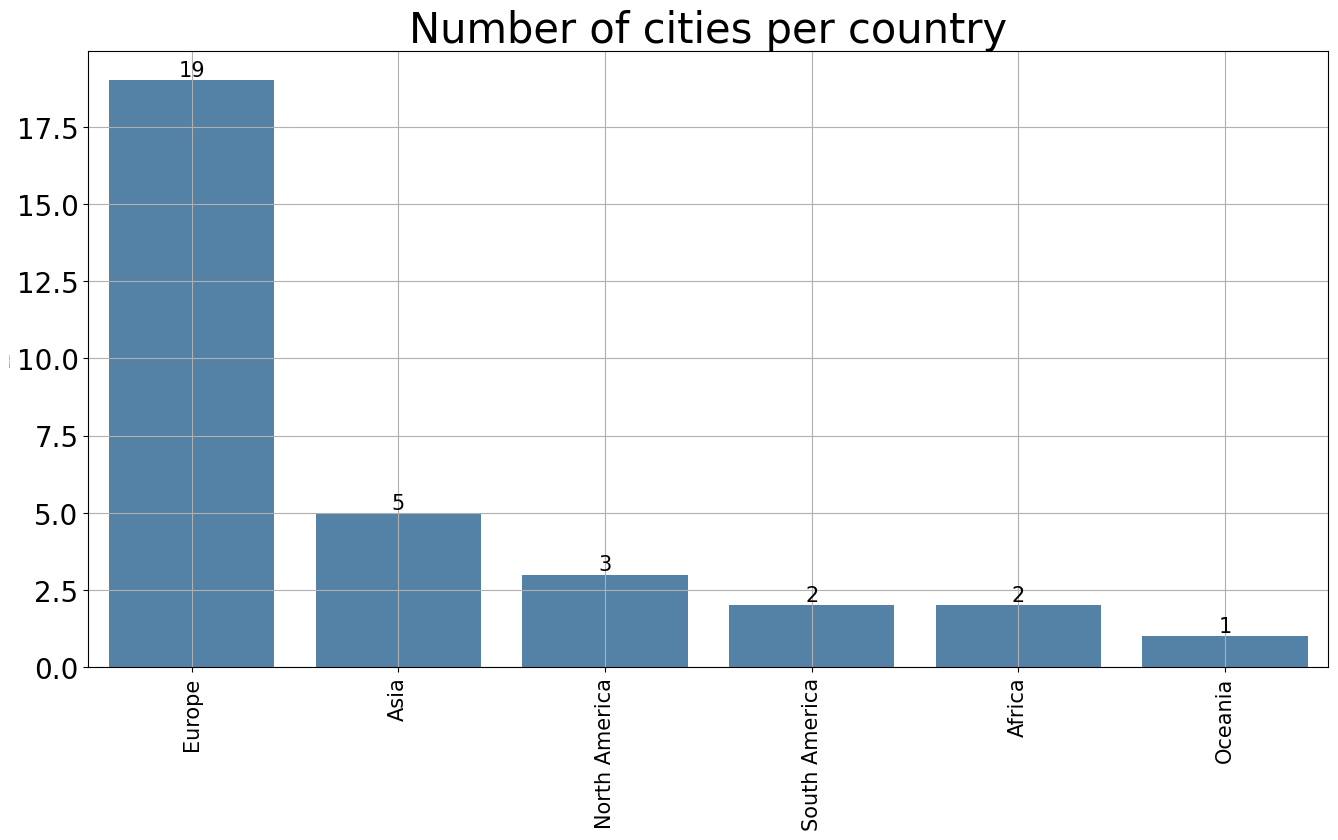

In [16]:
cc_df = data_df[["continent", "country"]].drop_duplicates()["continent"].value_counts().reset_index()
# cc_df.rename(columns={"index": "continent", "continent": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=cc_df,
            x=cc_df.columns[0],
            y=cc_df.columns[1],
            ax=ax,
            color="steelblue",
            order=cc_df.sort_values(cc_df.columns[1], ascending=False)[cc_df.columns[0]]
           )

sns_fig.set_title(f"Number of cities per country", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_cities_per_continent.png')
plt.show()

#### Number of cities per continent

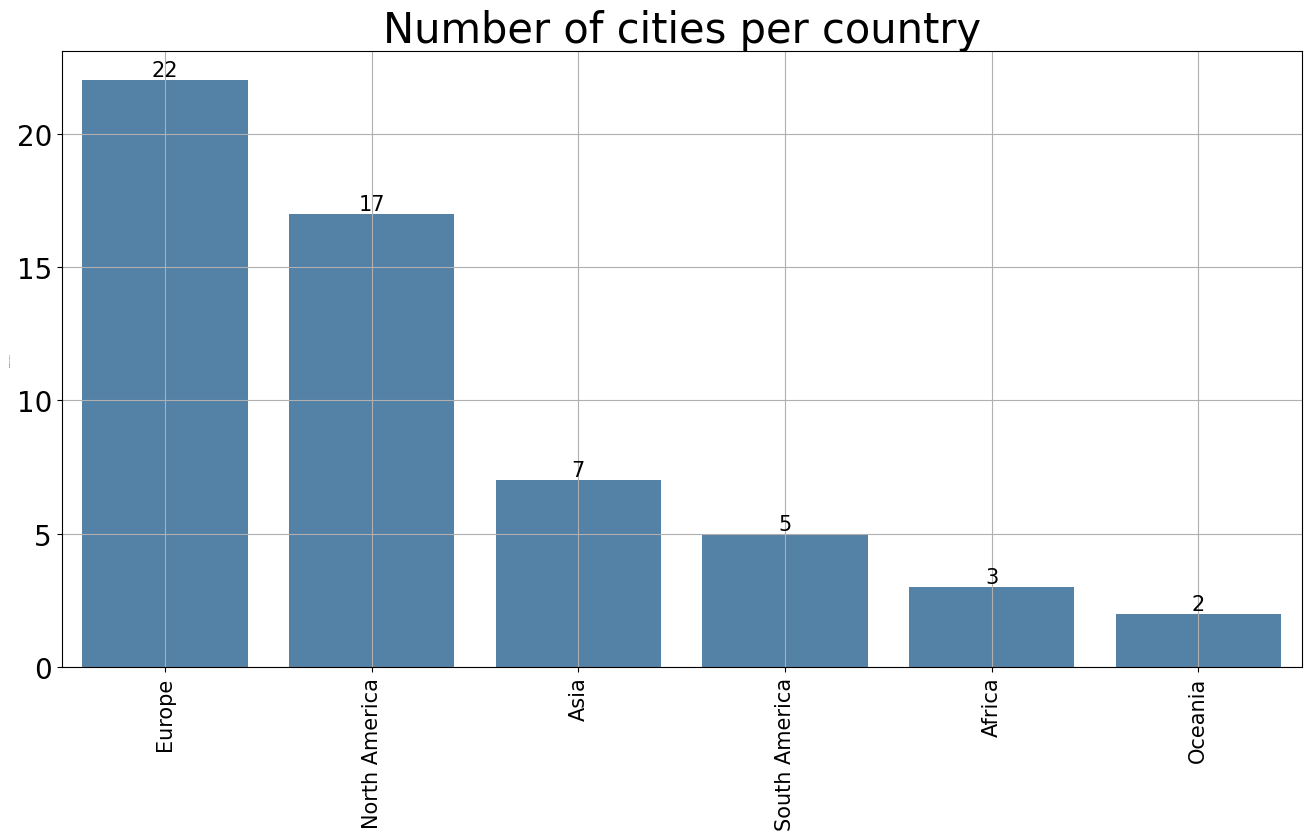

In [17]:
cc_df = data_df[["continent", "city"]].drop_duplicates()["continent"].value_counts().reset_index()
# cc_df.rename(columns={"index": "continent", "continent": "unique_images"}, inplace=True)
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

sns_fig = sns.barplot(
            data=cc_df,
            x=cc_df.columns[0],
            y=cc_df.columns[1],
            ax=ax,
            color="steelblue",
            order=cc_df.sort_values(cc_df.columns[1], ascending=False)[cc_df.columns[0]]
           )

sns_fig.set_title(f"Number of cities per country", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=90, labelsize=15)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_cities_per_continent.png')
plt.show()

#### Number of images evaluated

Total unique images: 108438


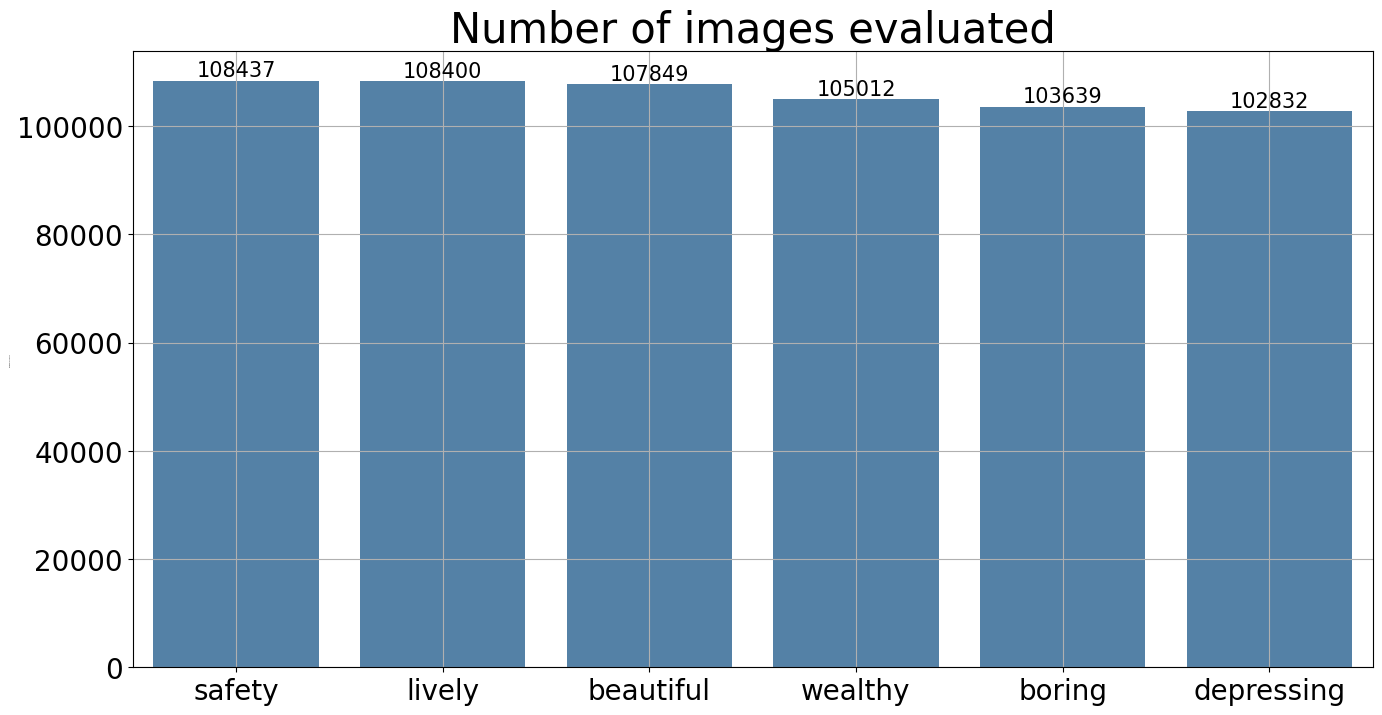

In [18]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

zero_counts = data_df[metrics].ne(0.0).sum().reset_index()
print("Total unique images:", len(data_df))

sns_fig = sns.barplot(
            data=zero_counts,
            x=zero_counts.columns[0],
            y=zero_counts.columns[1],
            ax=ax,
            color="steelblue",
            order=zero_counts.sort_values(zero_counts.columns[1], ascending=False)[zero_counts.columns[0]]
           )

sns_fig.set_title(f"Number of images evaluated", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_of_images_evaluated_per_category.png')
plt.show()

Total unique images: 108438


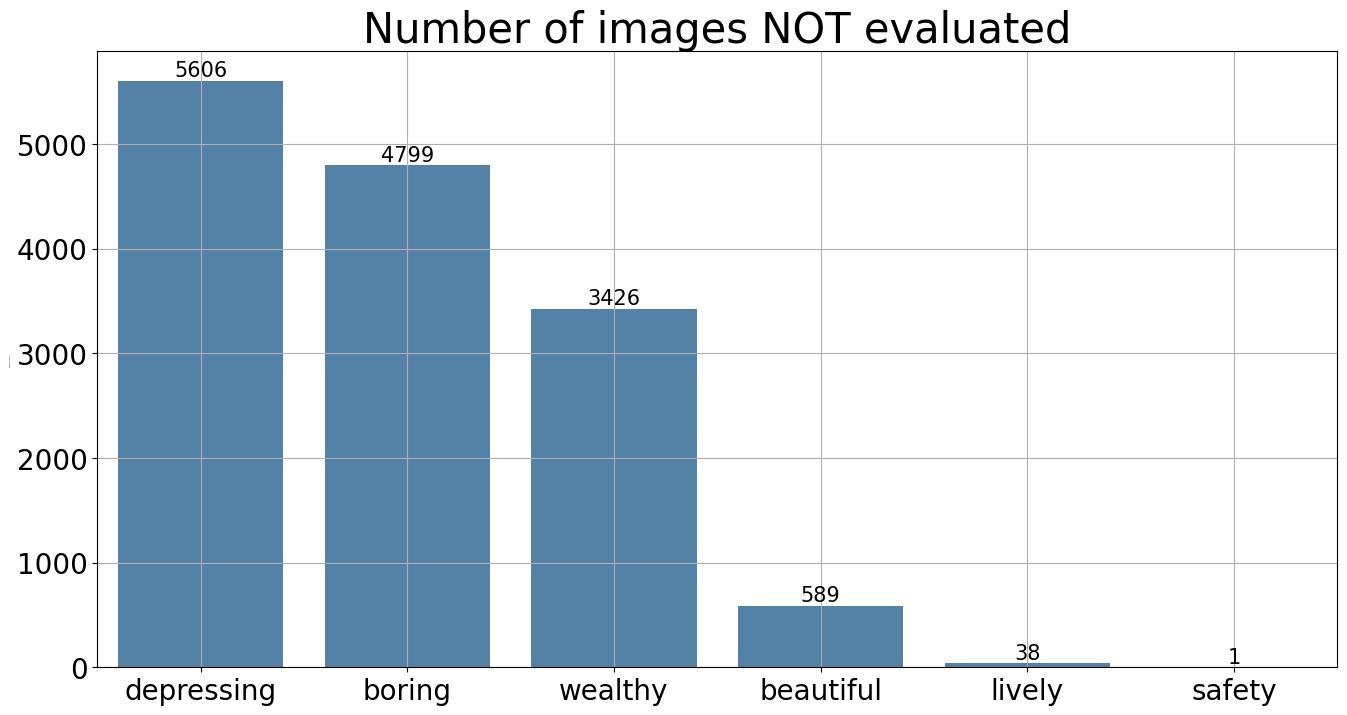

In [19]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=1, sharex=False, sharey=False)

zero_counts = data_df[metrics].eq(0.0).sum().reset_index()
print("Total unique images:", len(data_df))

sns_fig = sns.barplot(
            data=zero_counts,
            x=zero_counts.columns[0],
            y=zero_counts.columns[1],
            ax=ax,
            color="steelblue",
            order=zero_counts.sort_values(zero_counts.columns[1], ascending=False)[zero_counts.columns[0]]
           )

sns_fig.set_title(f"Number of images NOT evaluated", fontsize=30)
sns_fig.set_ylabel(f"Number of images", fontsize=0)
sns_fig.set_xlabel('', fontsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

# rotate the axis ticklabels
_ = sns_fig.tick_params(axis='y', labelsize=20)

# add annotation
_ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=15,rotation=0)

# add a space on y for the annotations
#sns_fig.margins(x=0.1)
ax.grid(True)

# fig.savefig(f'{PROCESSED_IMAGES_PATH}/number_of_images_evaluated_per_category.png')
plt.show()

#### Number of images per city and category

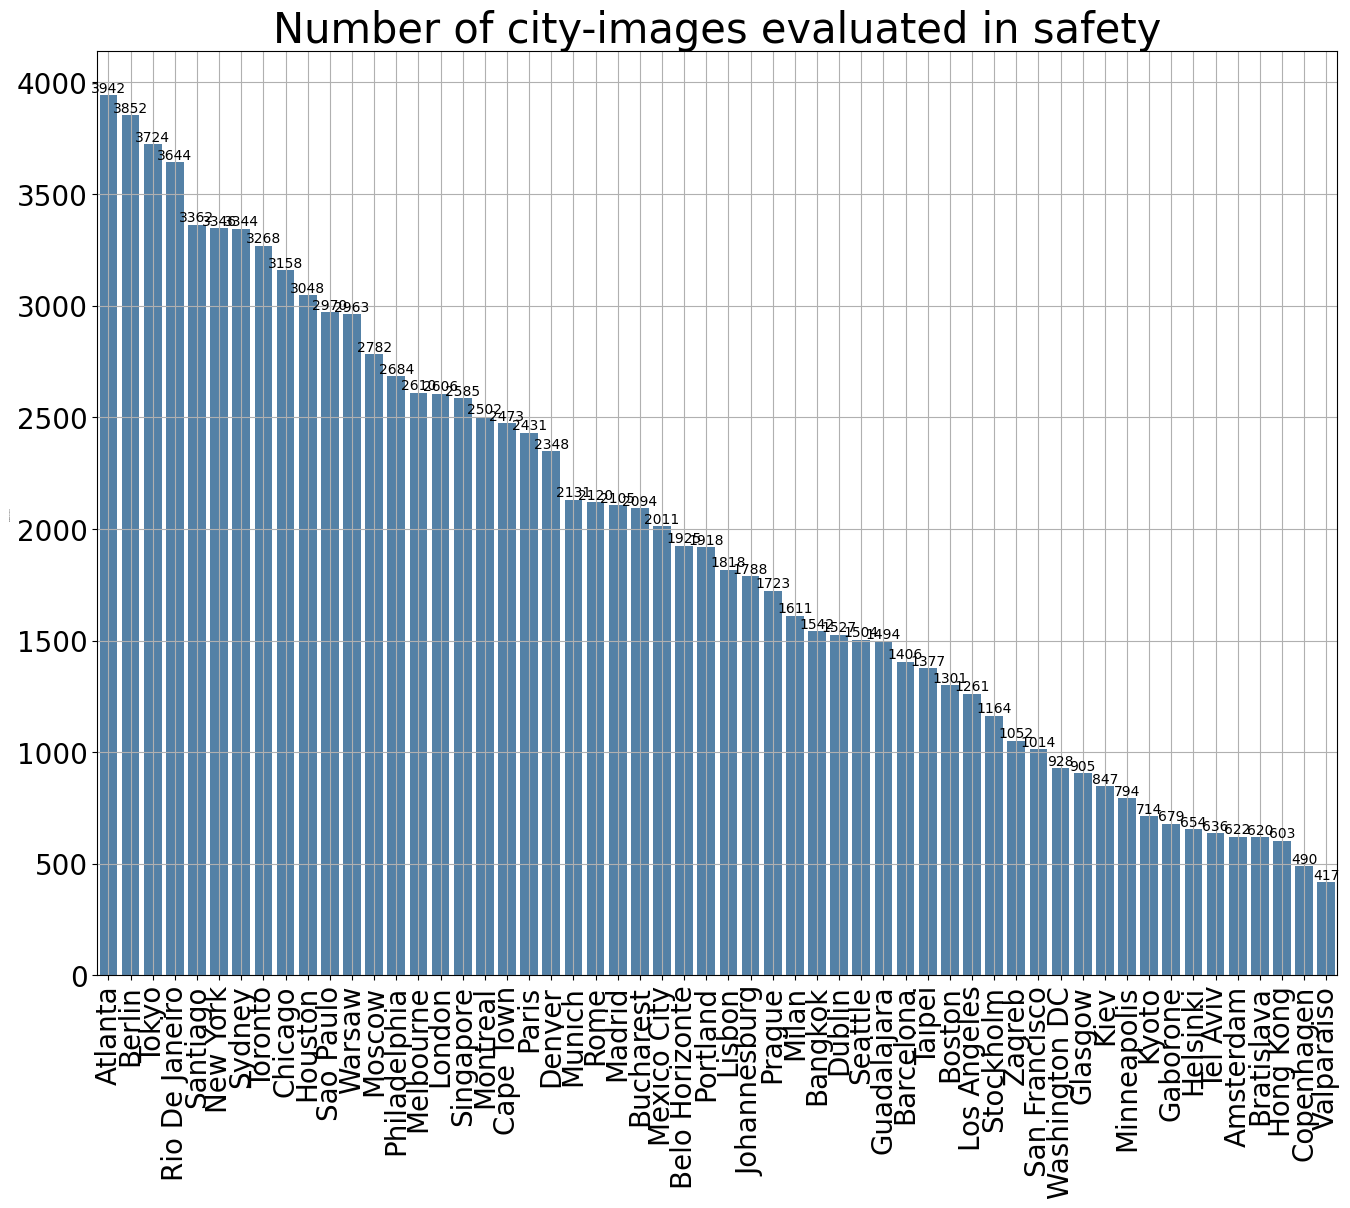

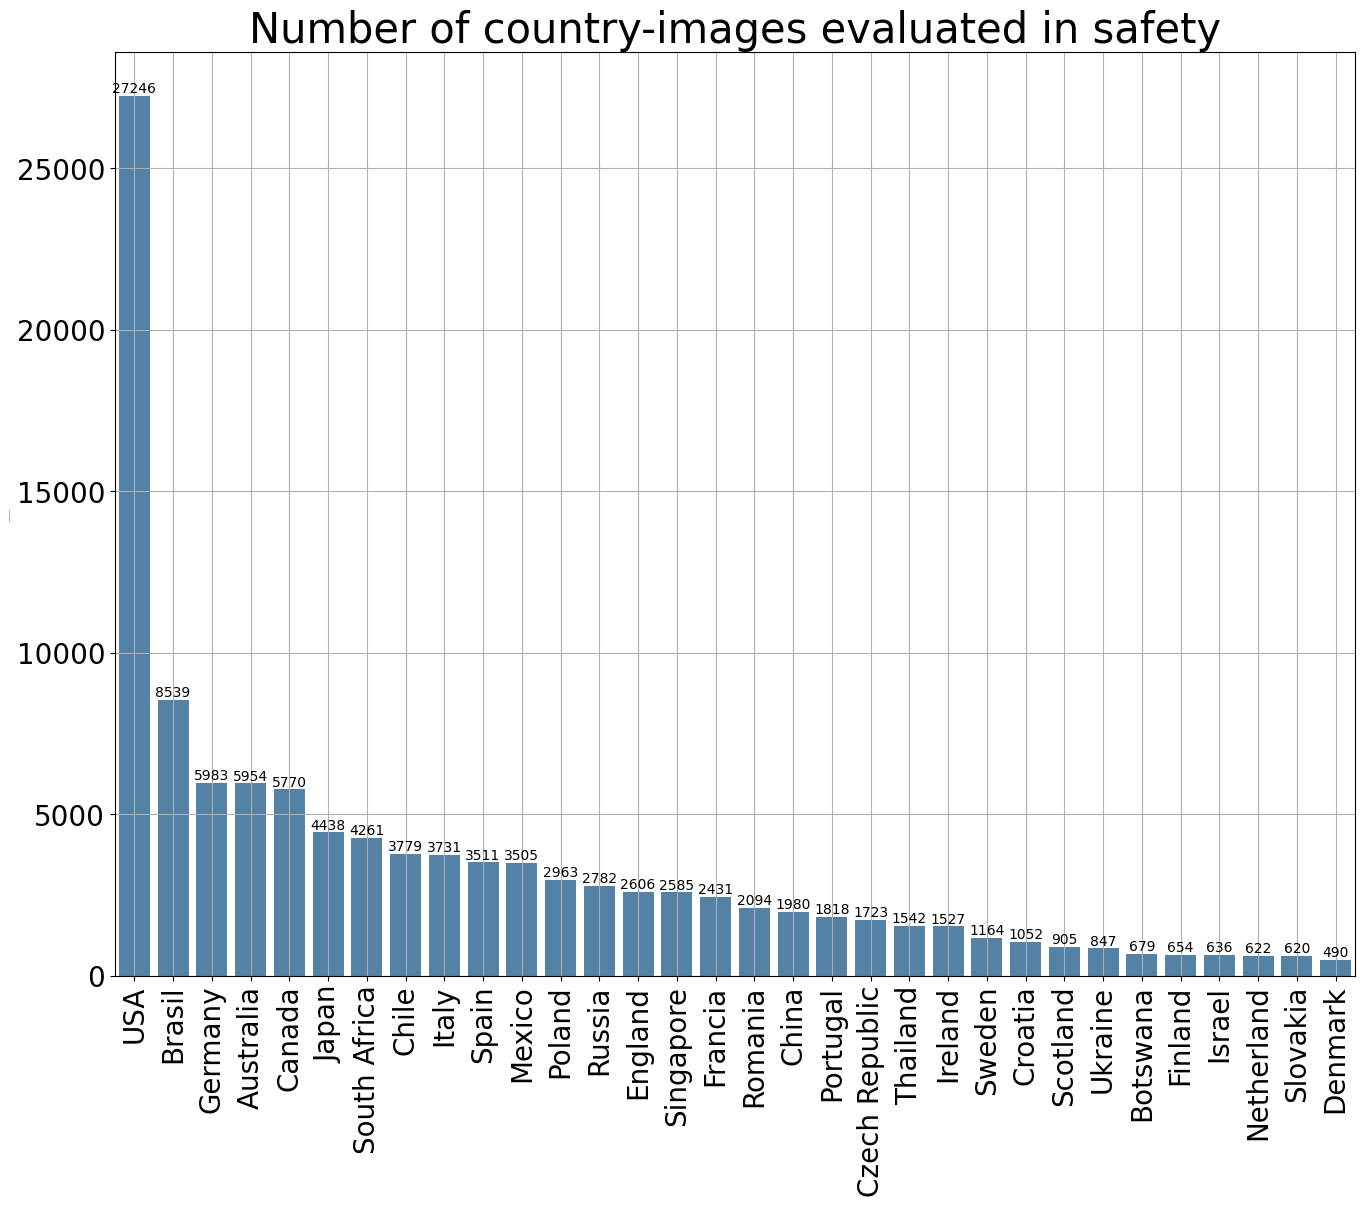

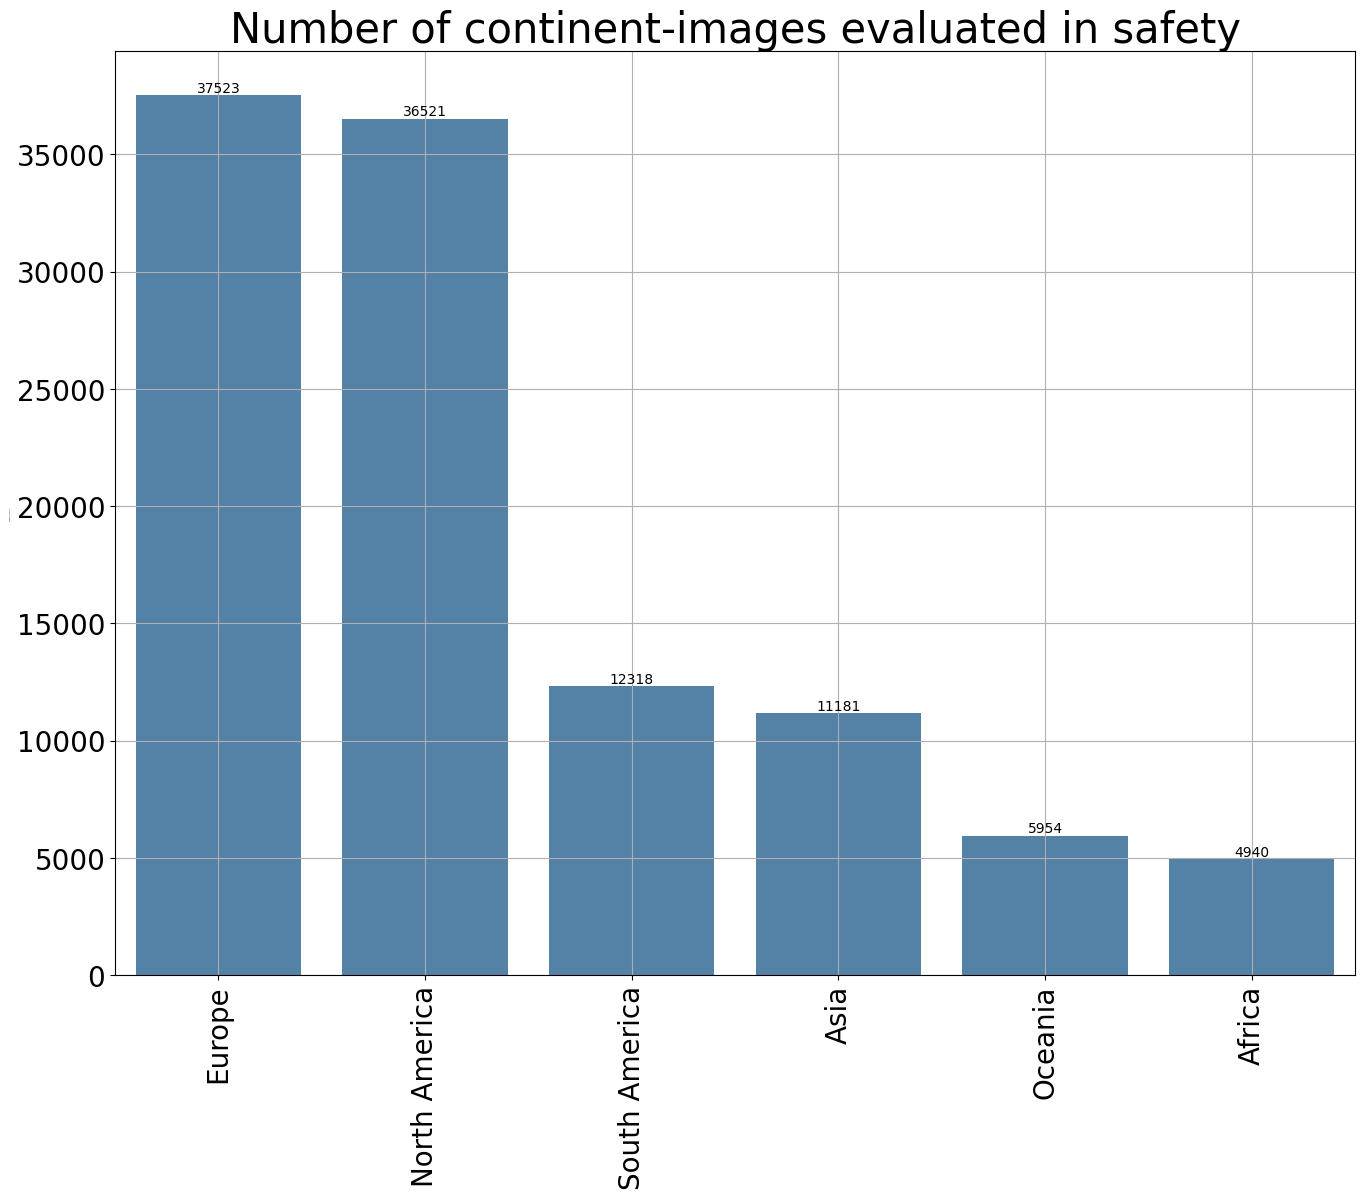

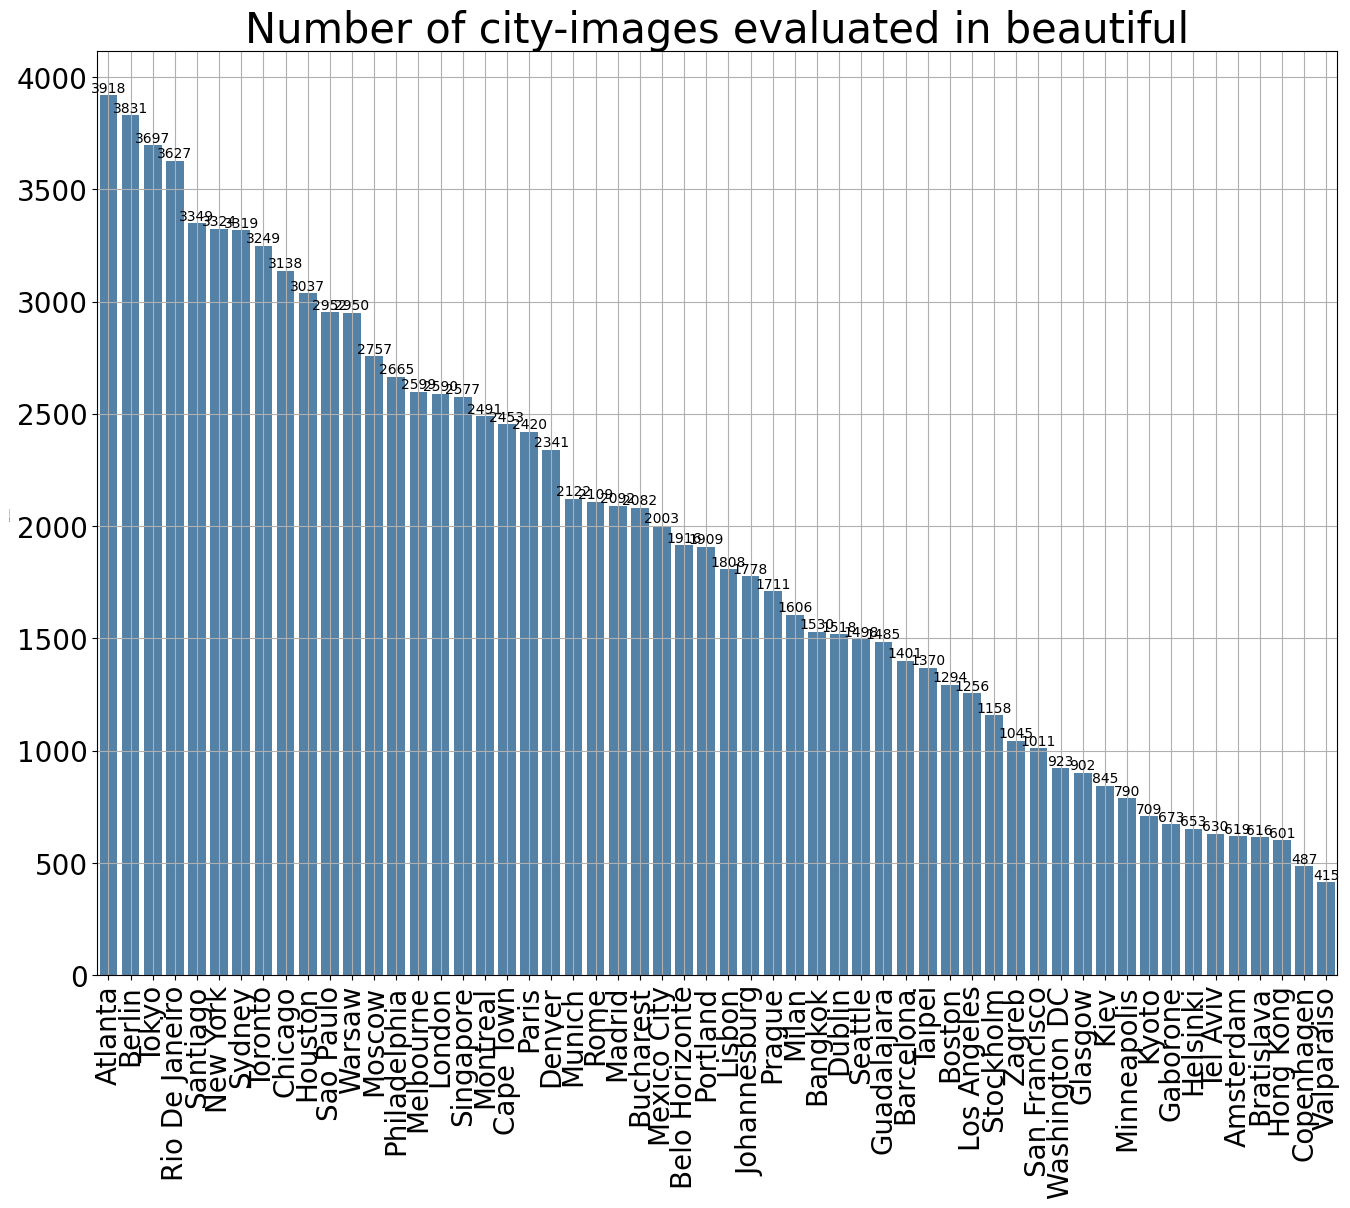

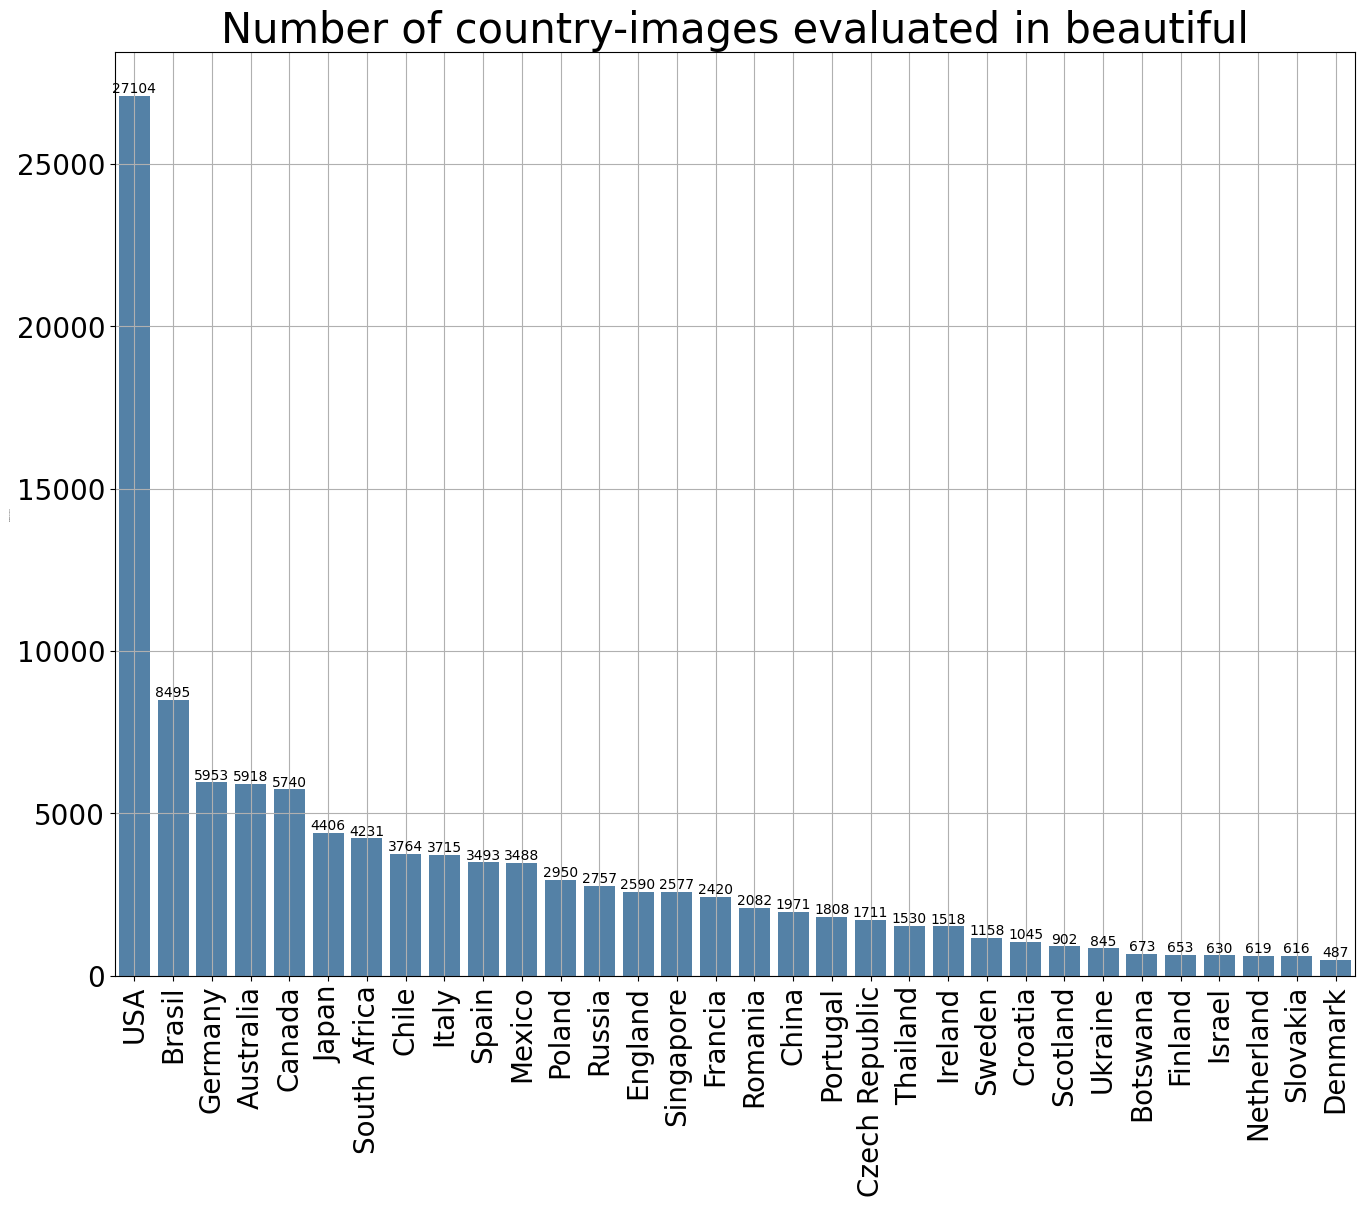

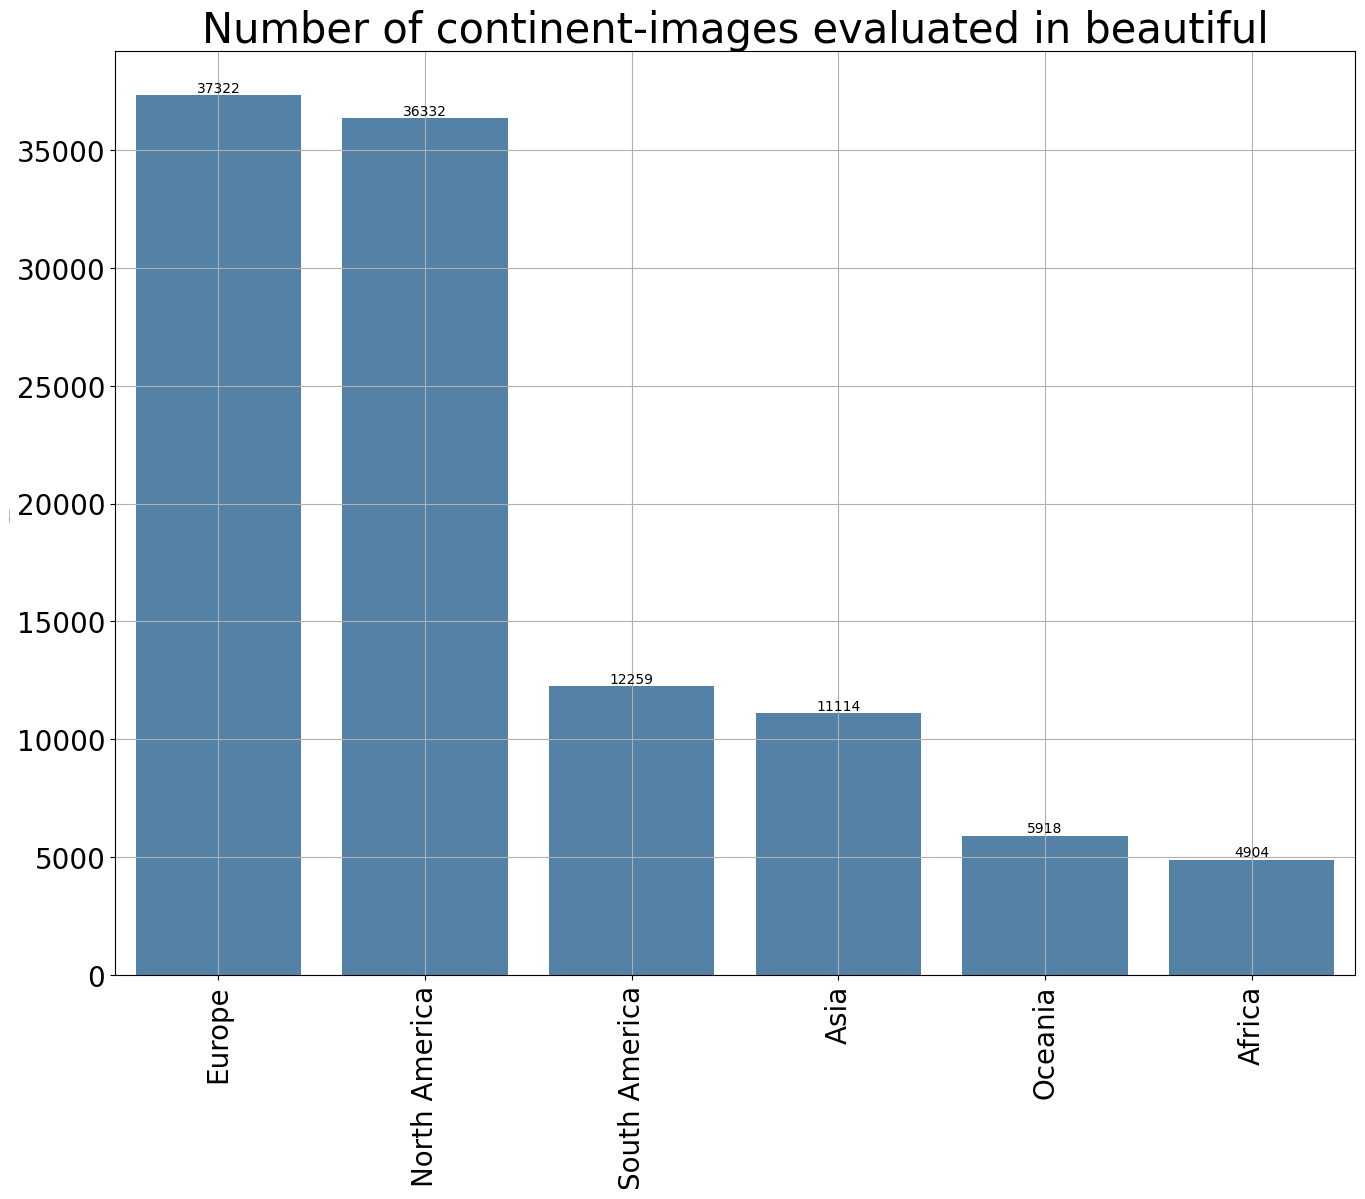

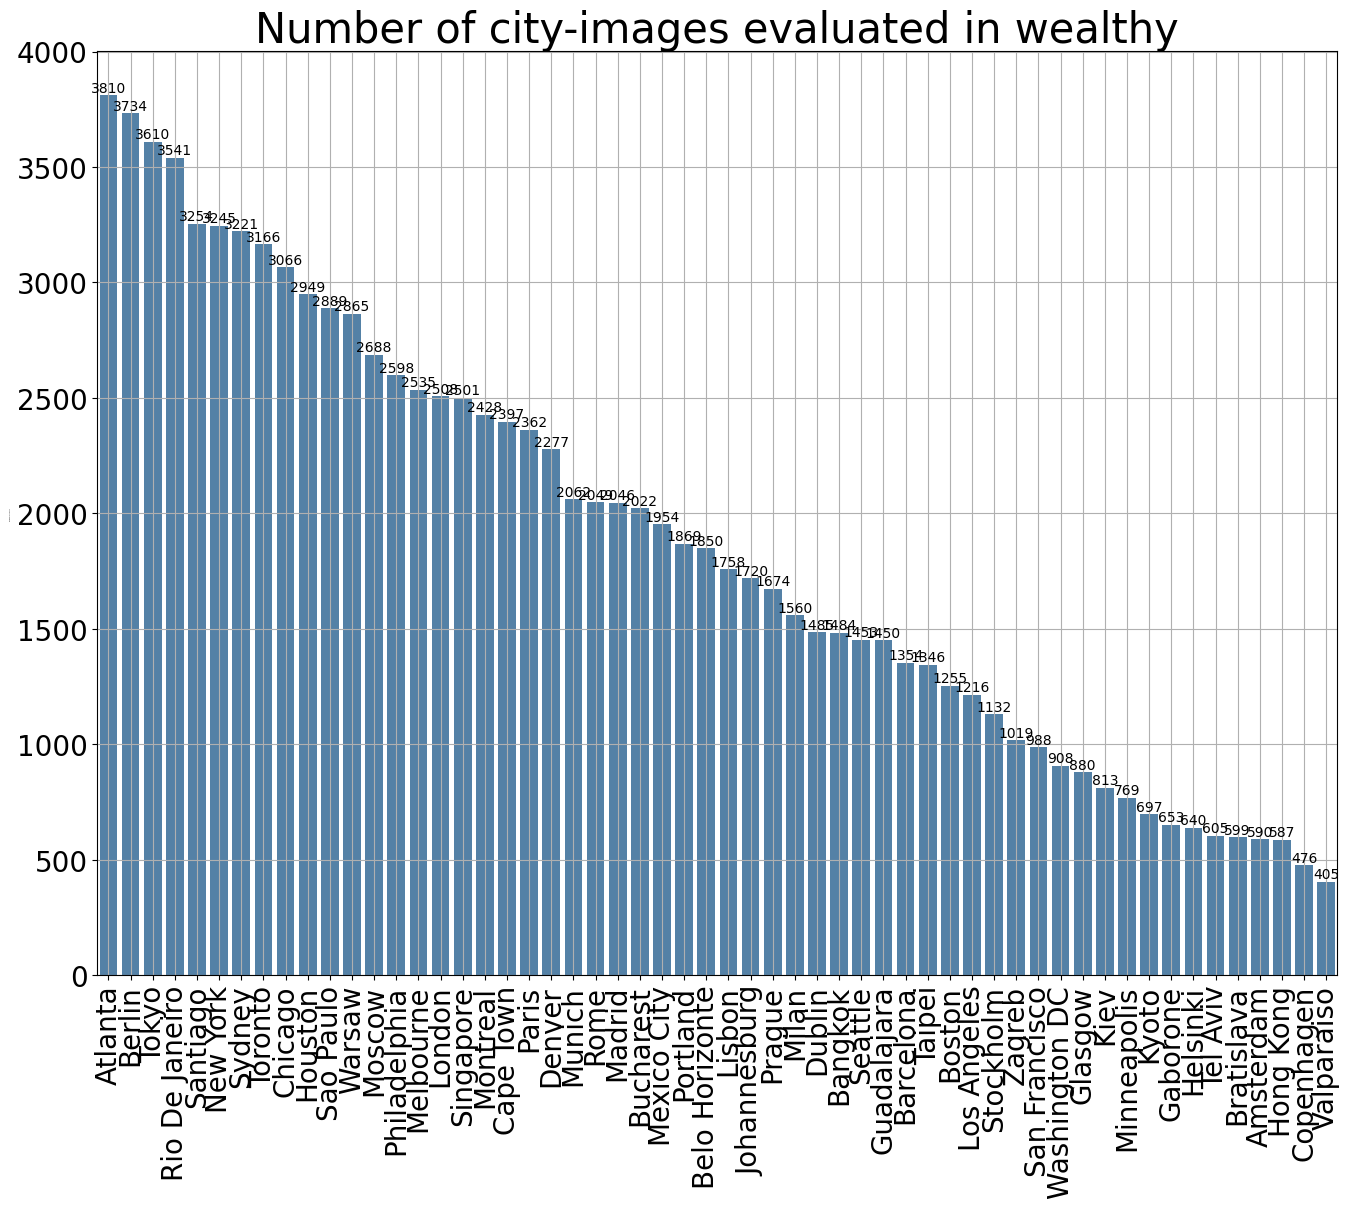

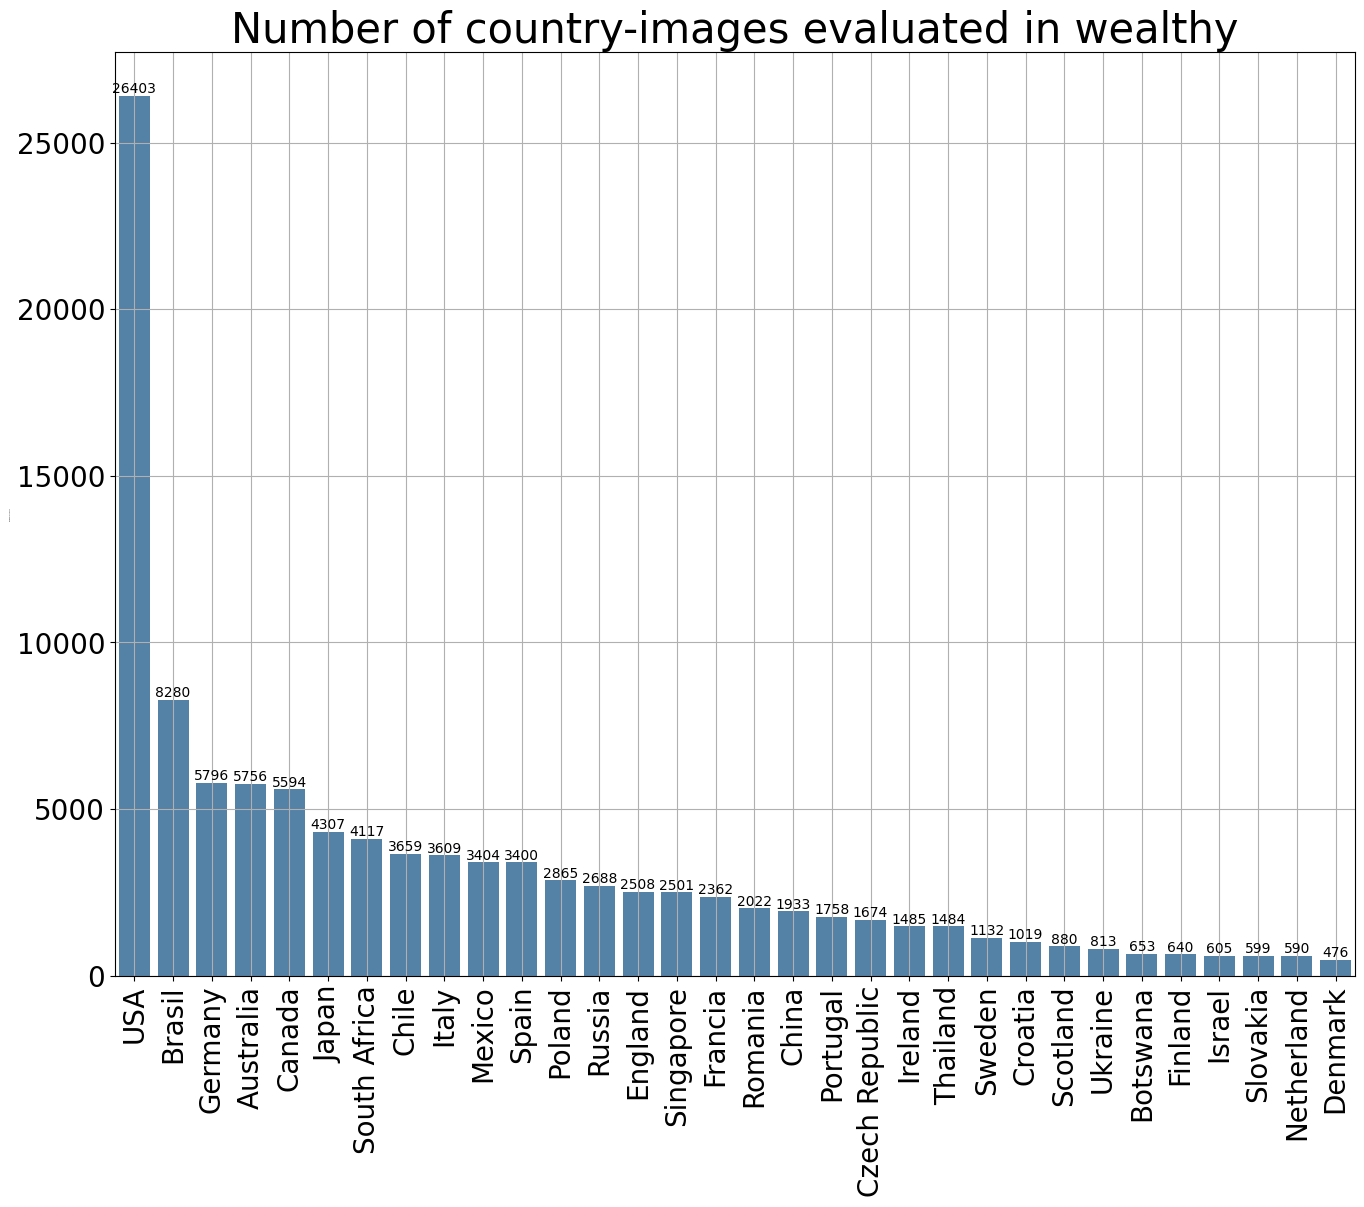

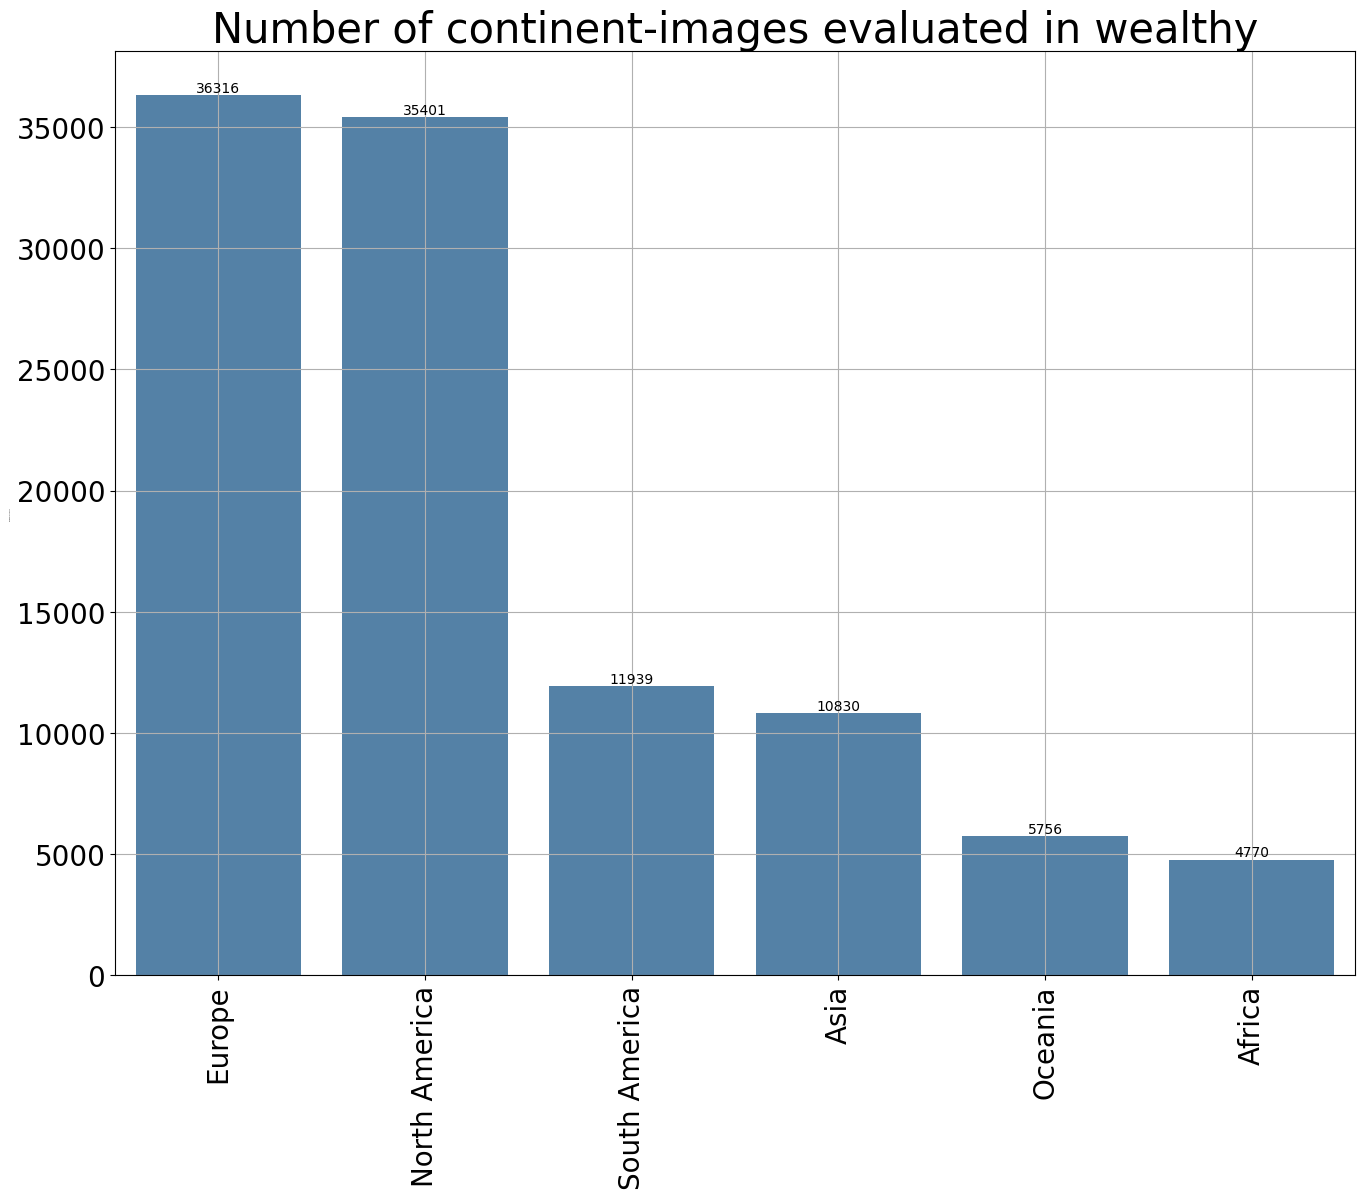

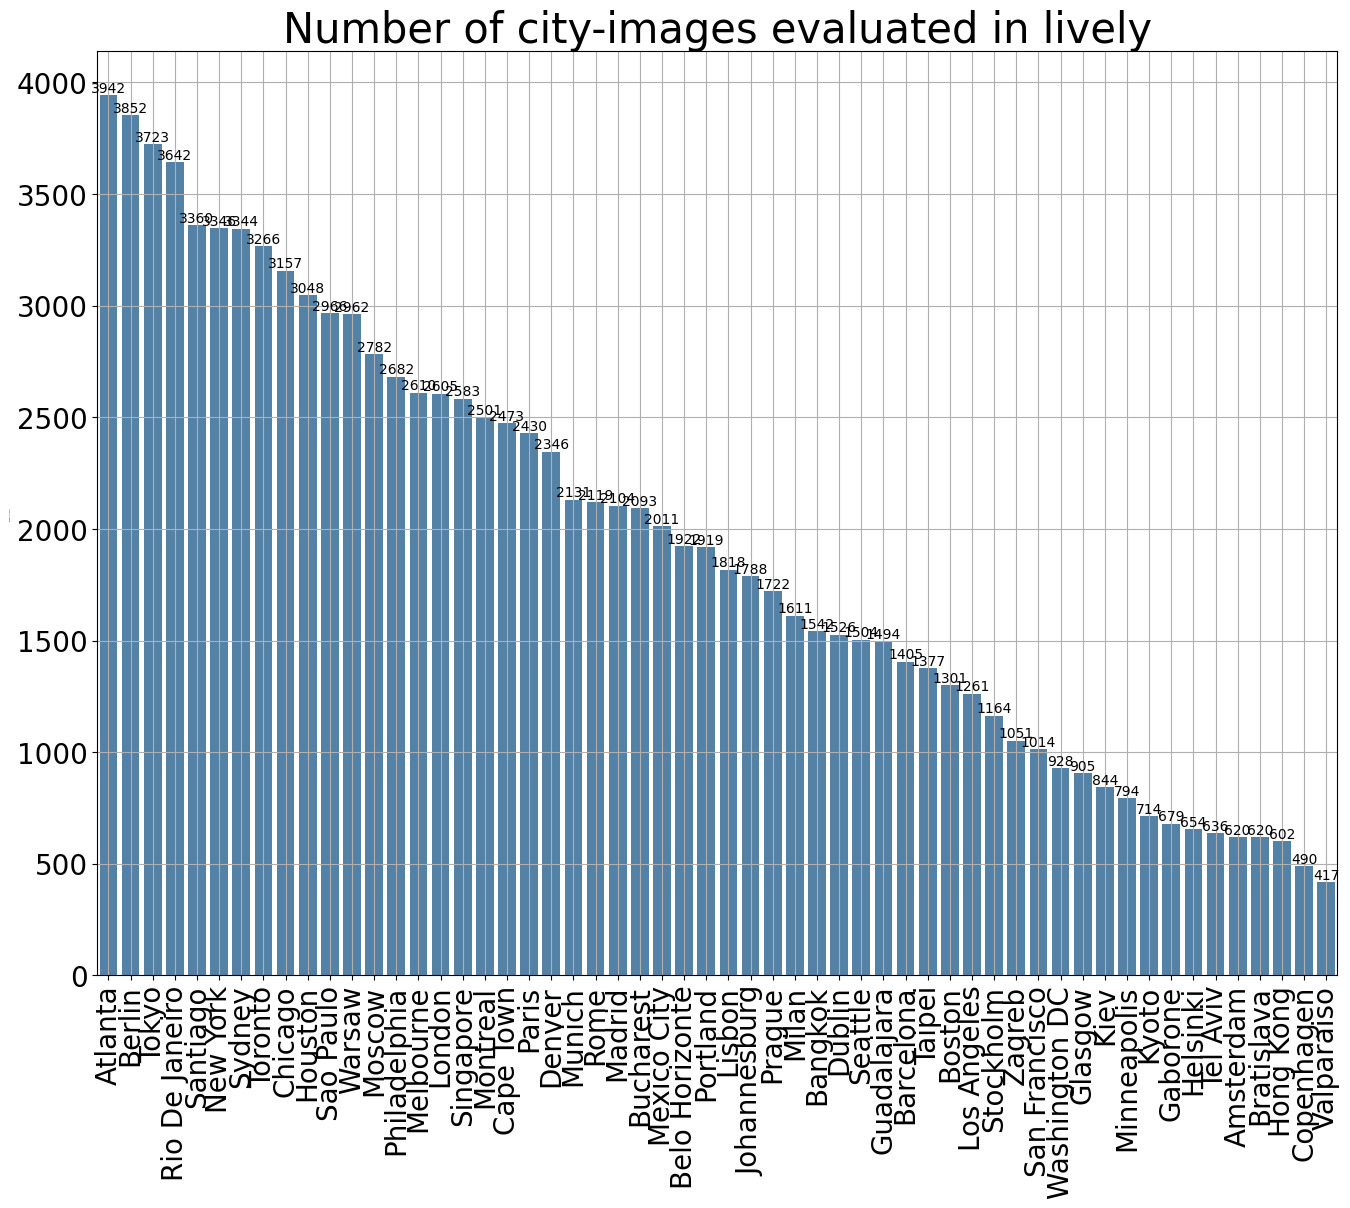

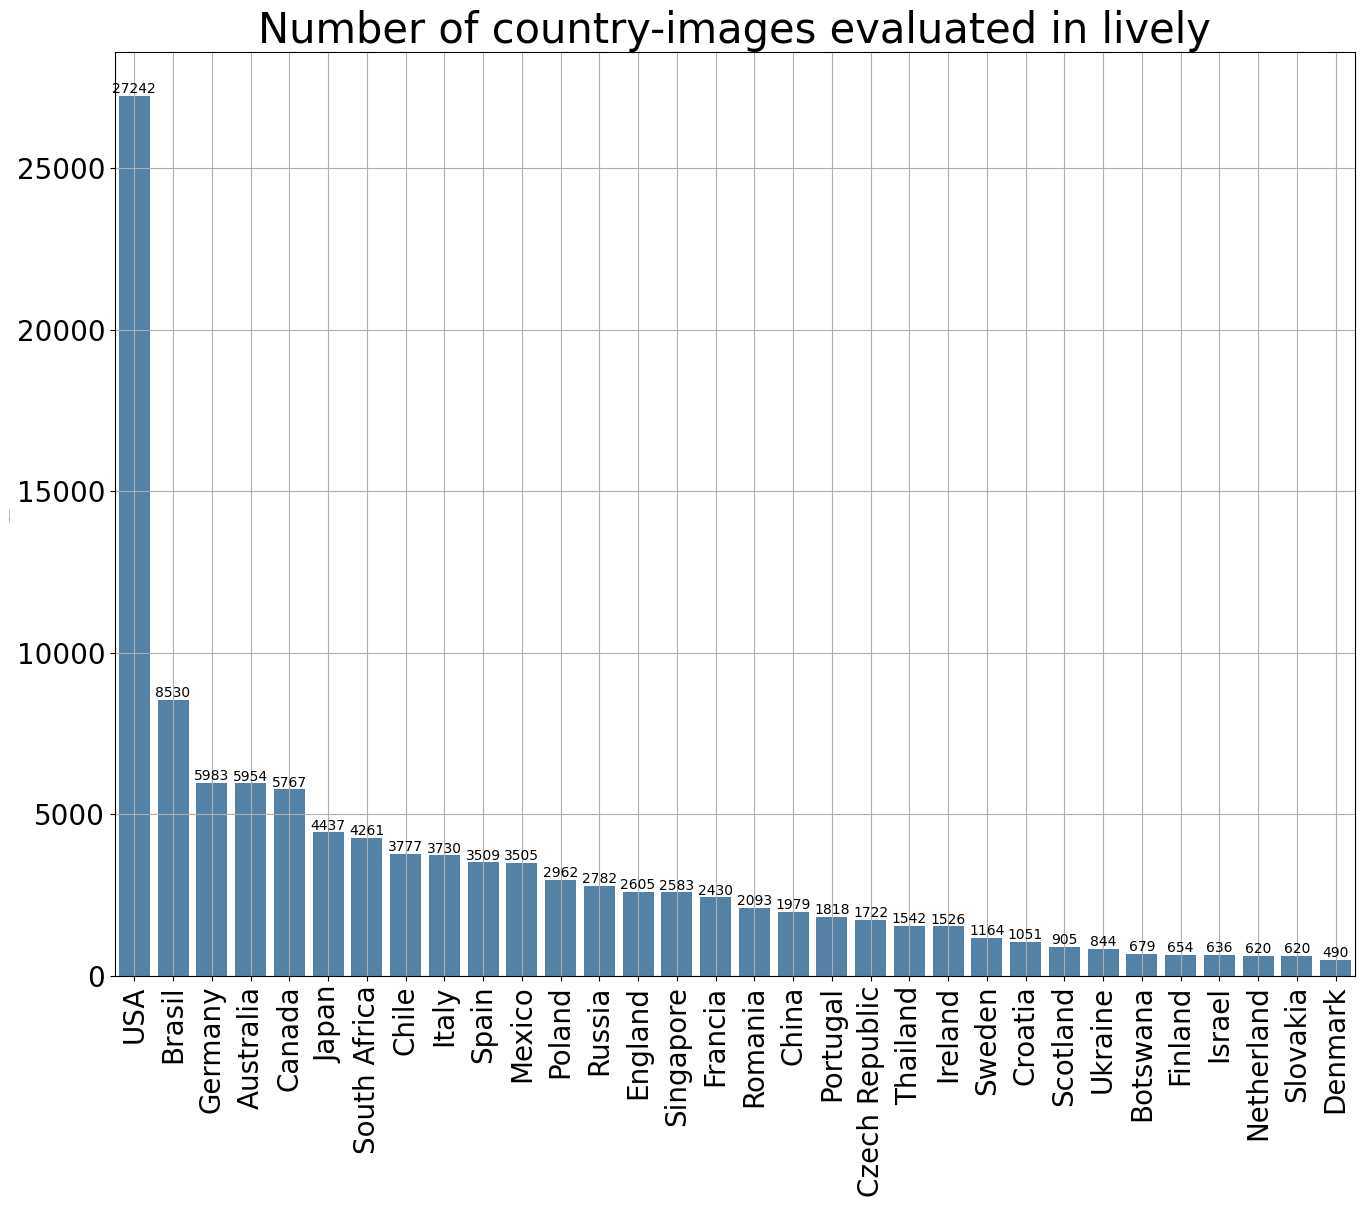

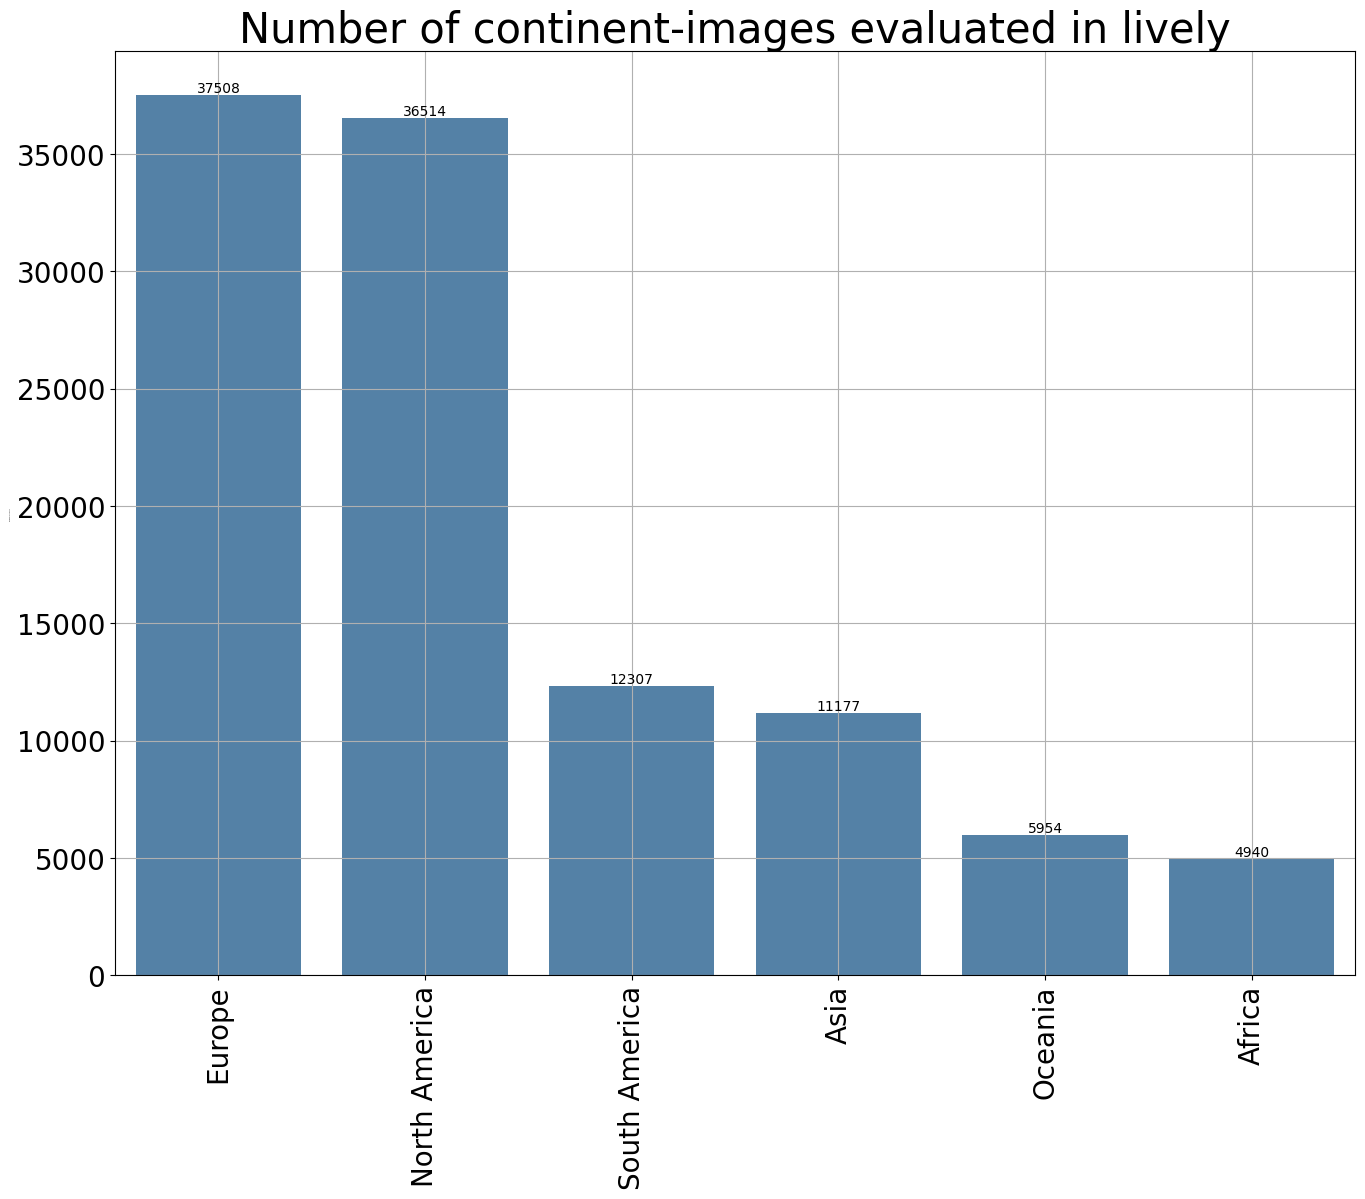

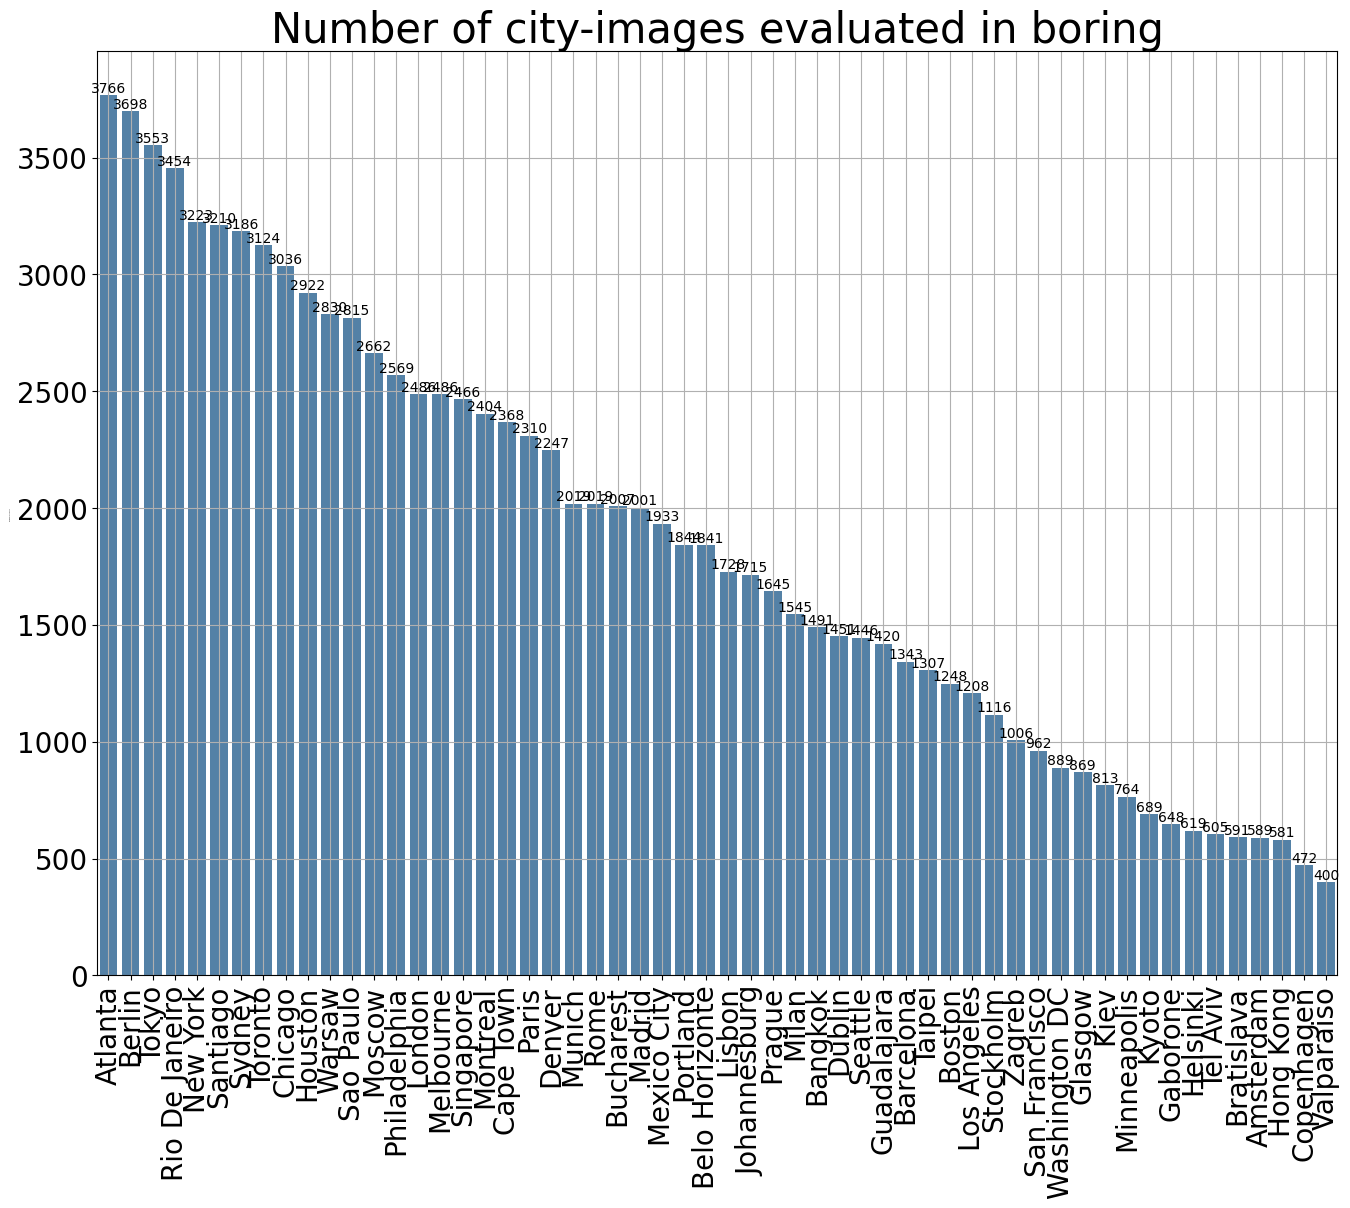

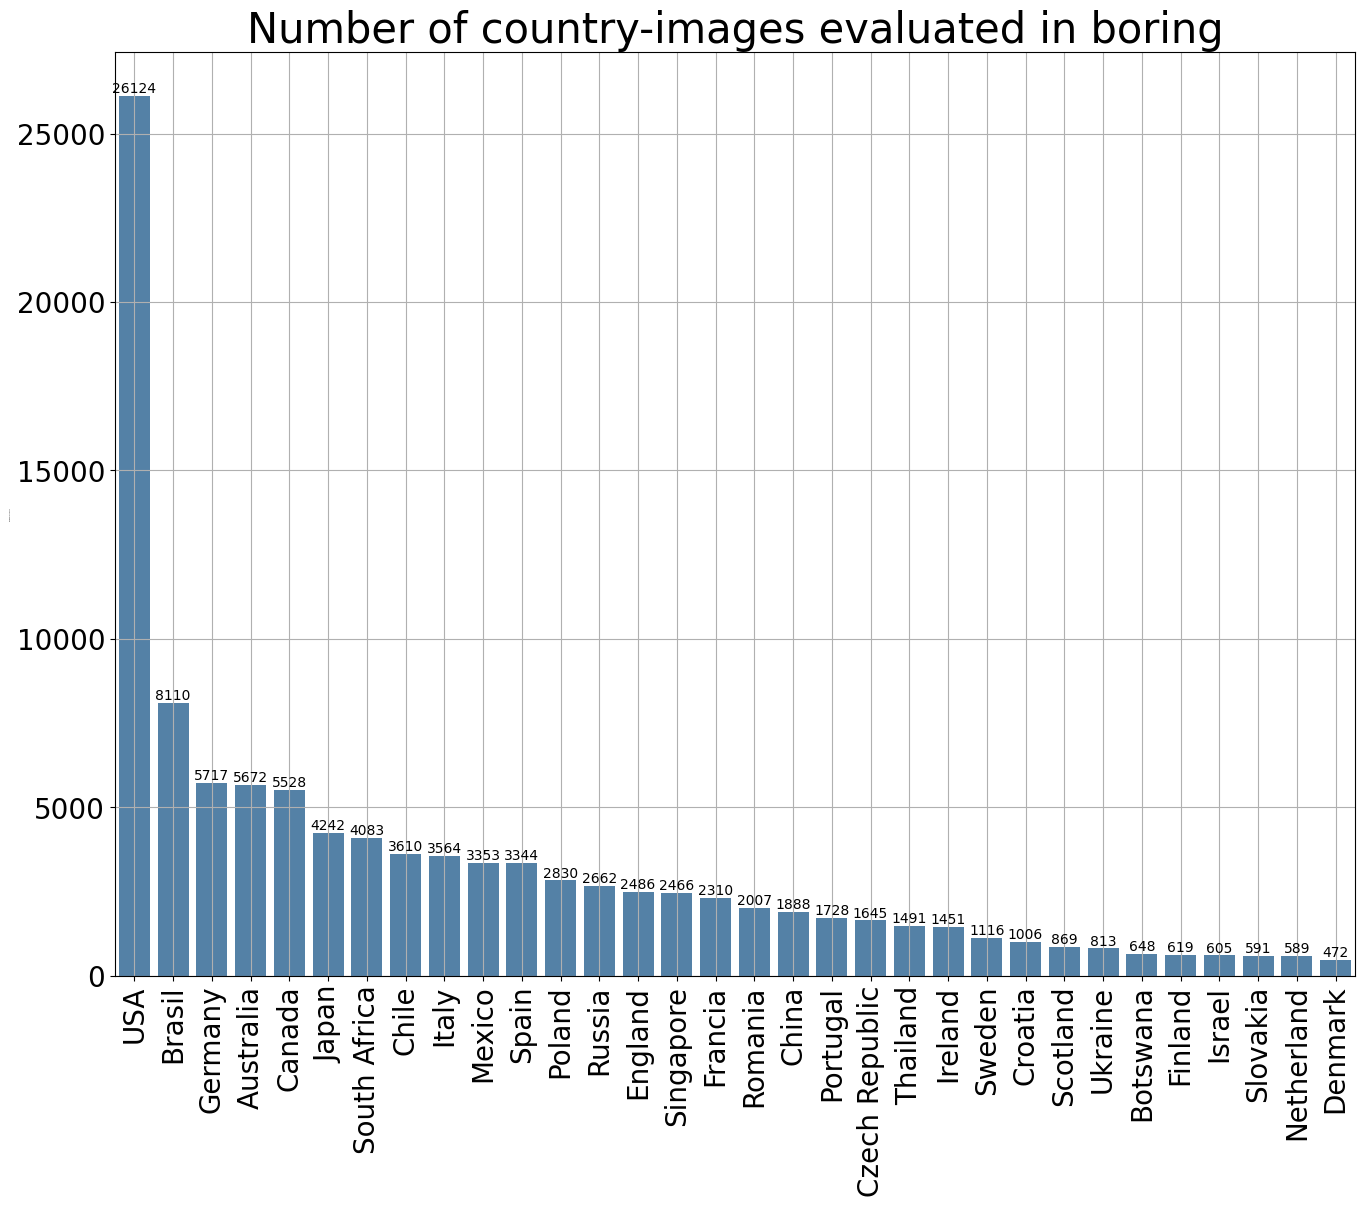

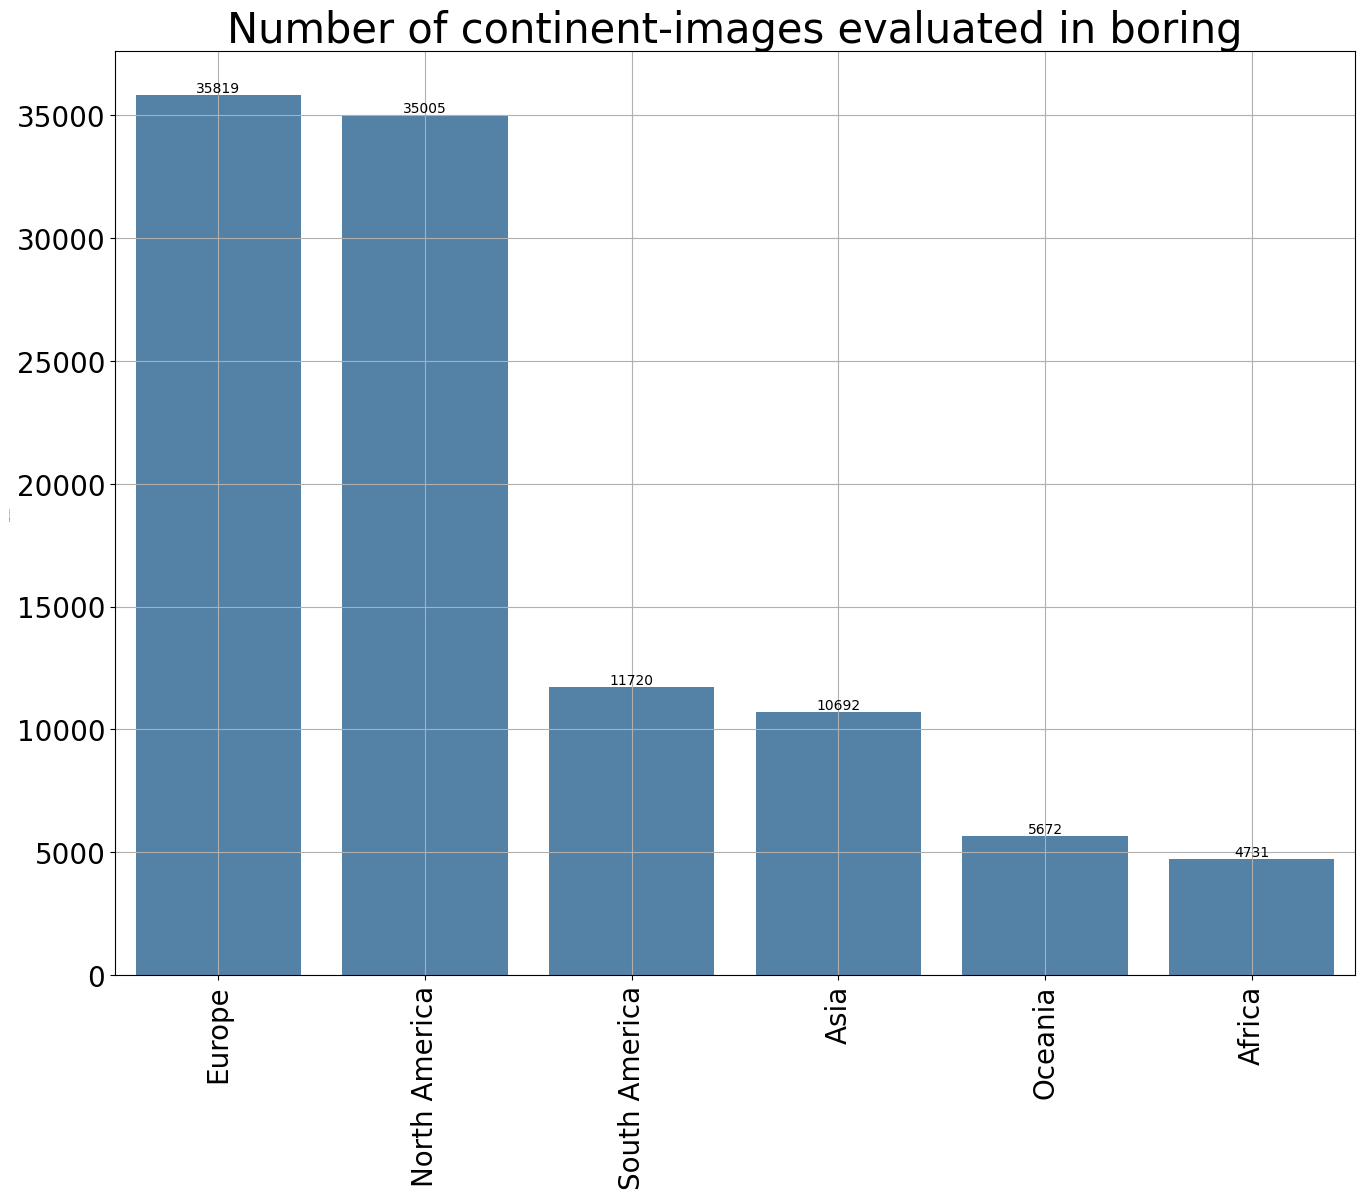

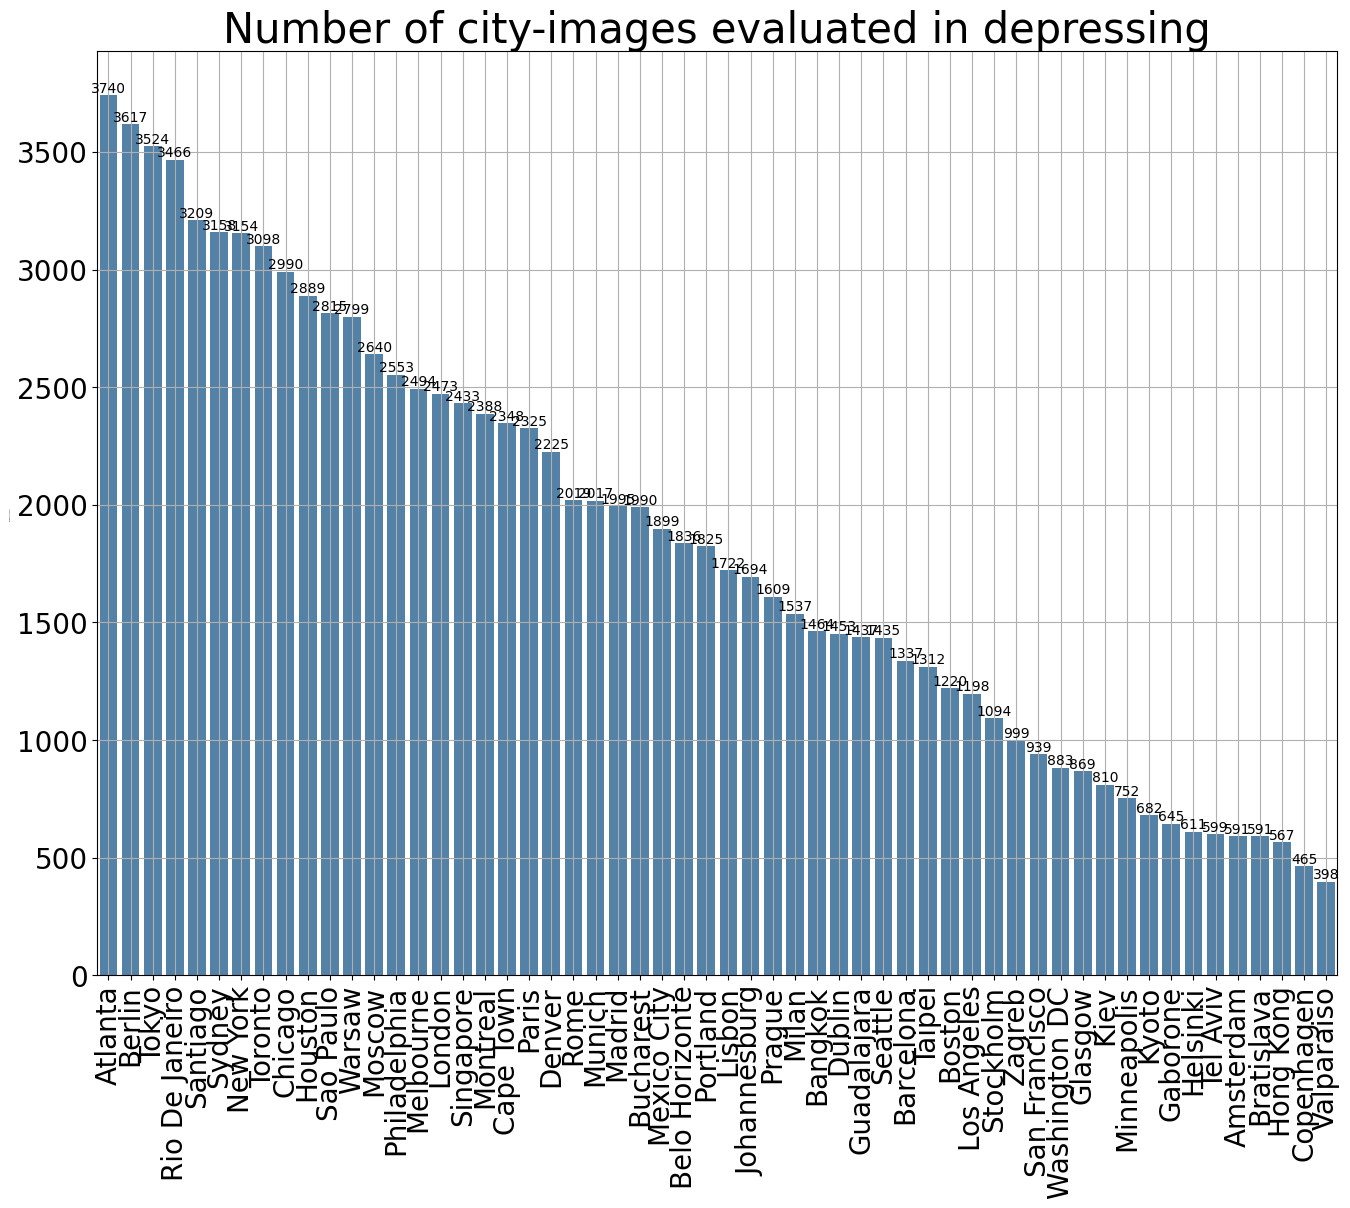

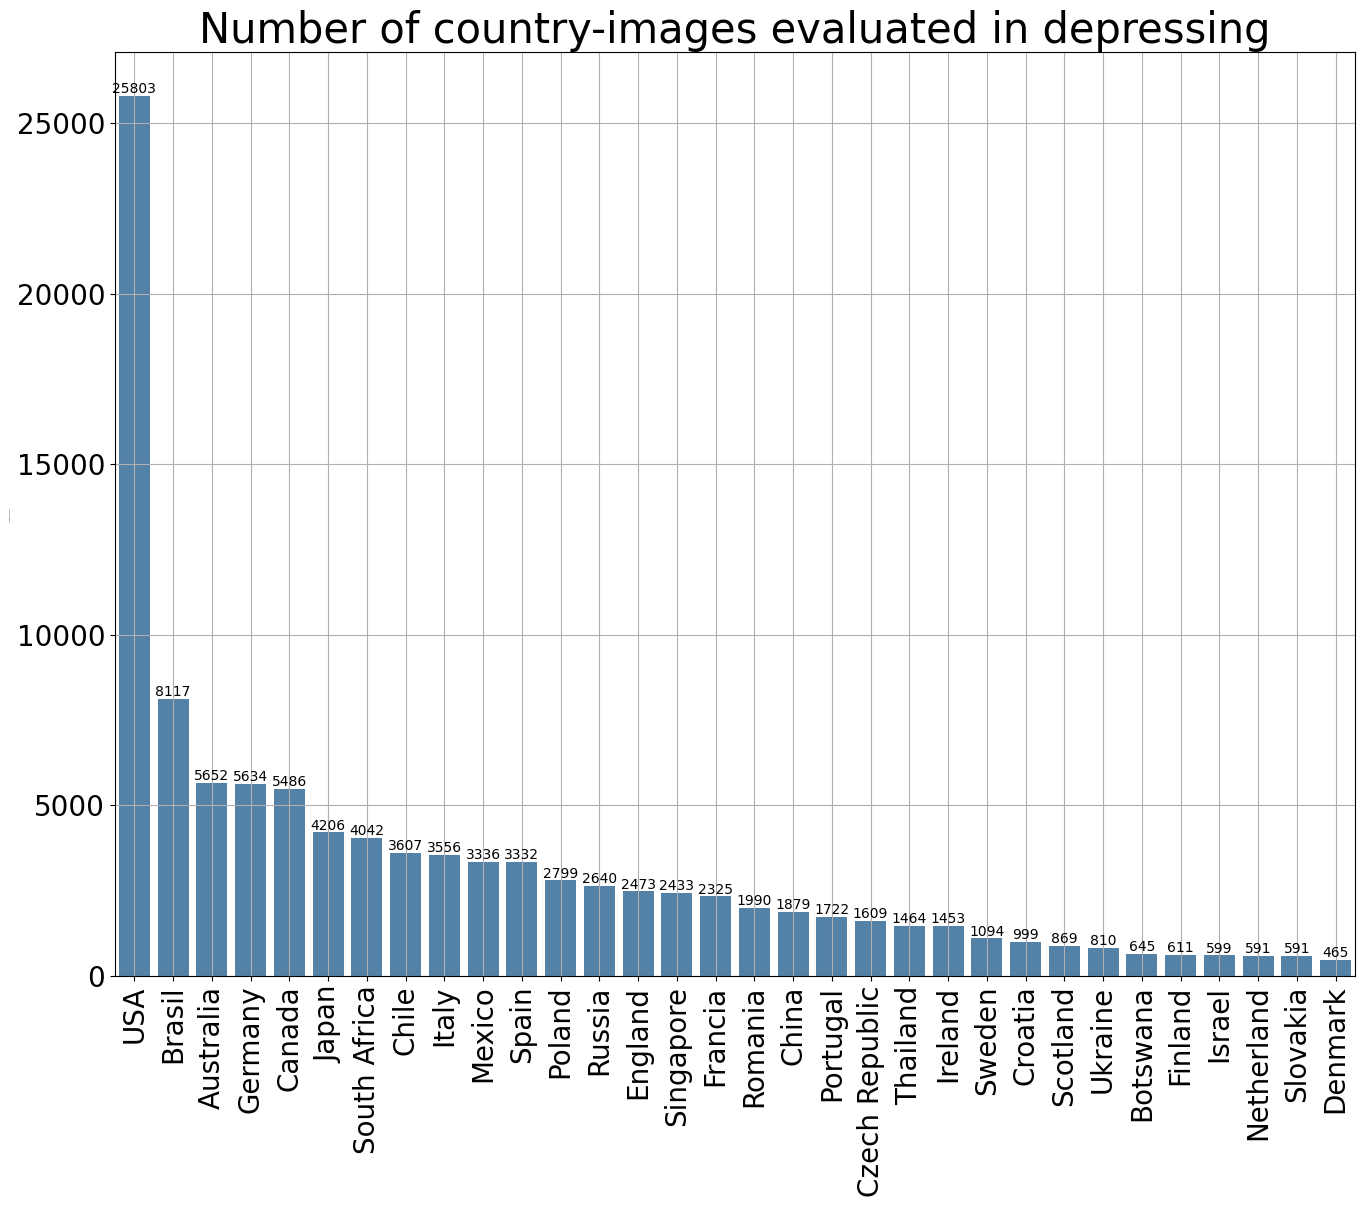

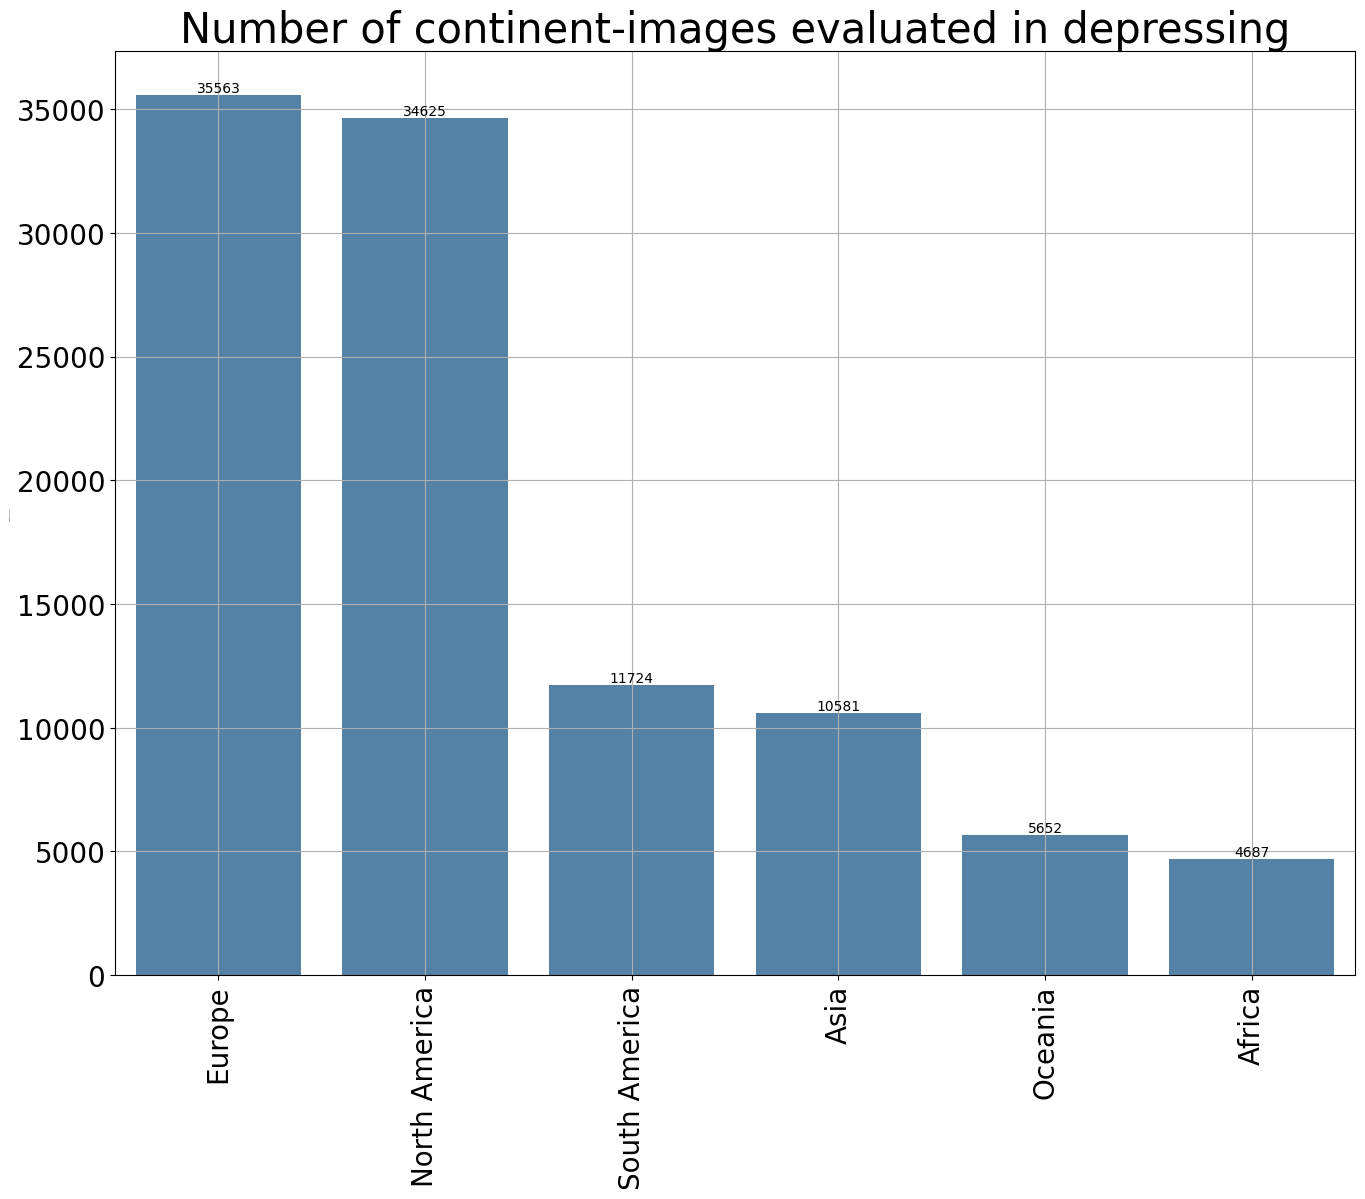

In [20]:
for metric in metrics:
    # verifyDir(f"{PROCESSED_IMAGES_PATH}{metric}/")
    df_ = data_df[data_df[metric]!=0.0].copy()
    for geo_level in ["city", "country", "continent"]:
        geo_df = df_[[metric, geo_level, "image_id"]].drop_duplicates().value_counts().reset_index()
        geo_df = geo_df[[geo_level]].value_counts().reset_index()
        geo_df.rename(columns={0: "number_images"}, inplace=True)
        
        fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)
        sns_fig = sns.barplot(
                data=geo_df,
                x=geo_df.columns[0],
                y=geo_df.columns[1],
                ax=ax,
                color="steelblue",
                order=geo_df.sort_values(geo_df.columns[1], ascending=False)[geo_df.columns[0]]
               )

        sns_fig.set_title(f"Number of {geo_level}-images evaluated in {metric}", fontsize=30)
        sns_fig.set_ylabel(f"Number of images", fontsize=0)
        sns_fig.set_xlabel('', fontsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='x', rotation=90, labelsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='y', labelsize=20)

        # add annotation
        _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

        # add a space on y for the annotations
        #sns_fig.margins(x=0.1)
        ax.grid(True)

        # fig.savefig(f'{PROCESSED_IMAGES_PATH}/{metric}/number_images_evaluated_per_{geo_level}.png')
        plt.show()  

### Score histogram per category

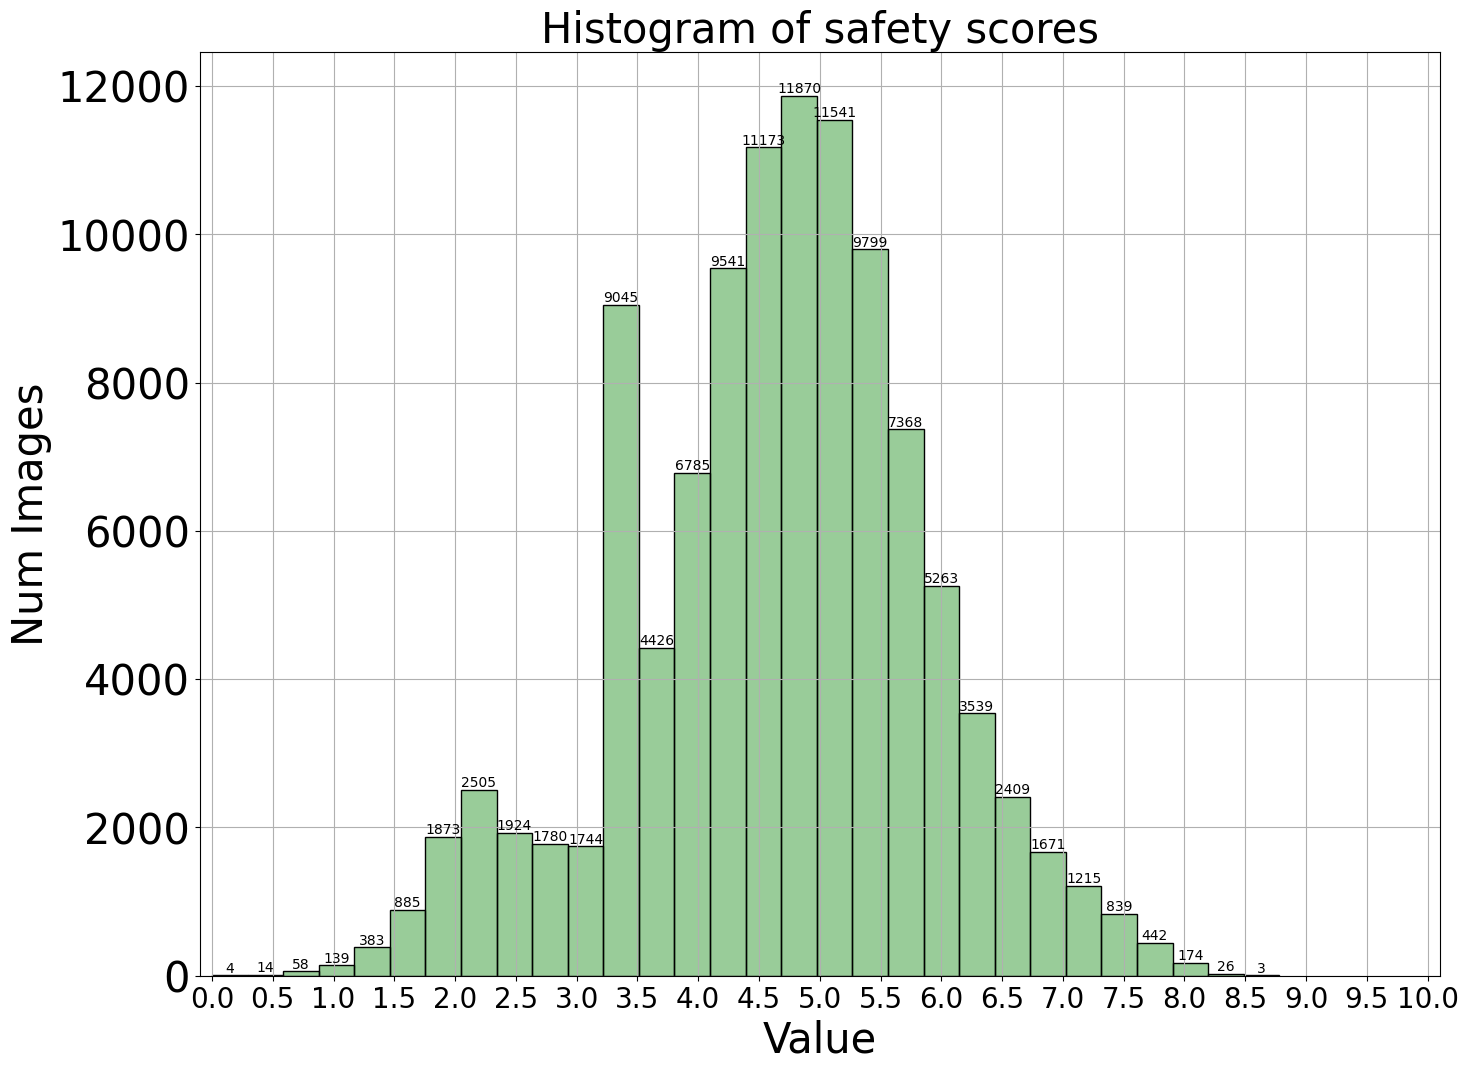

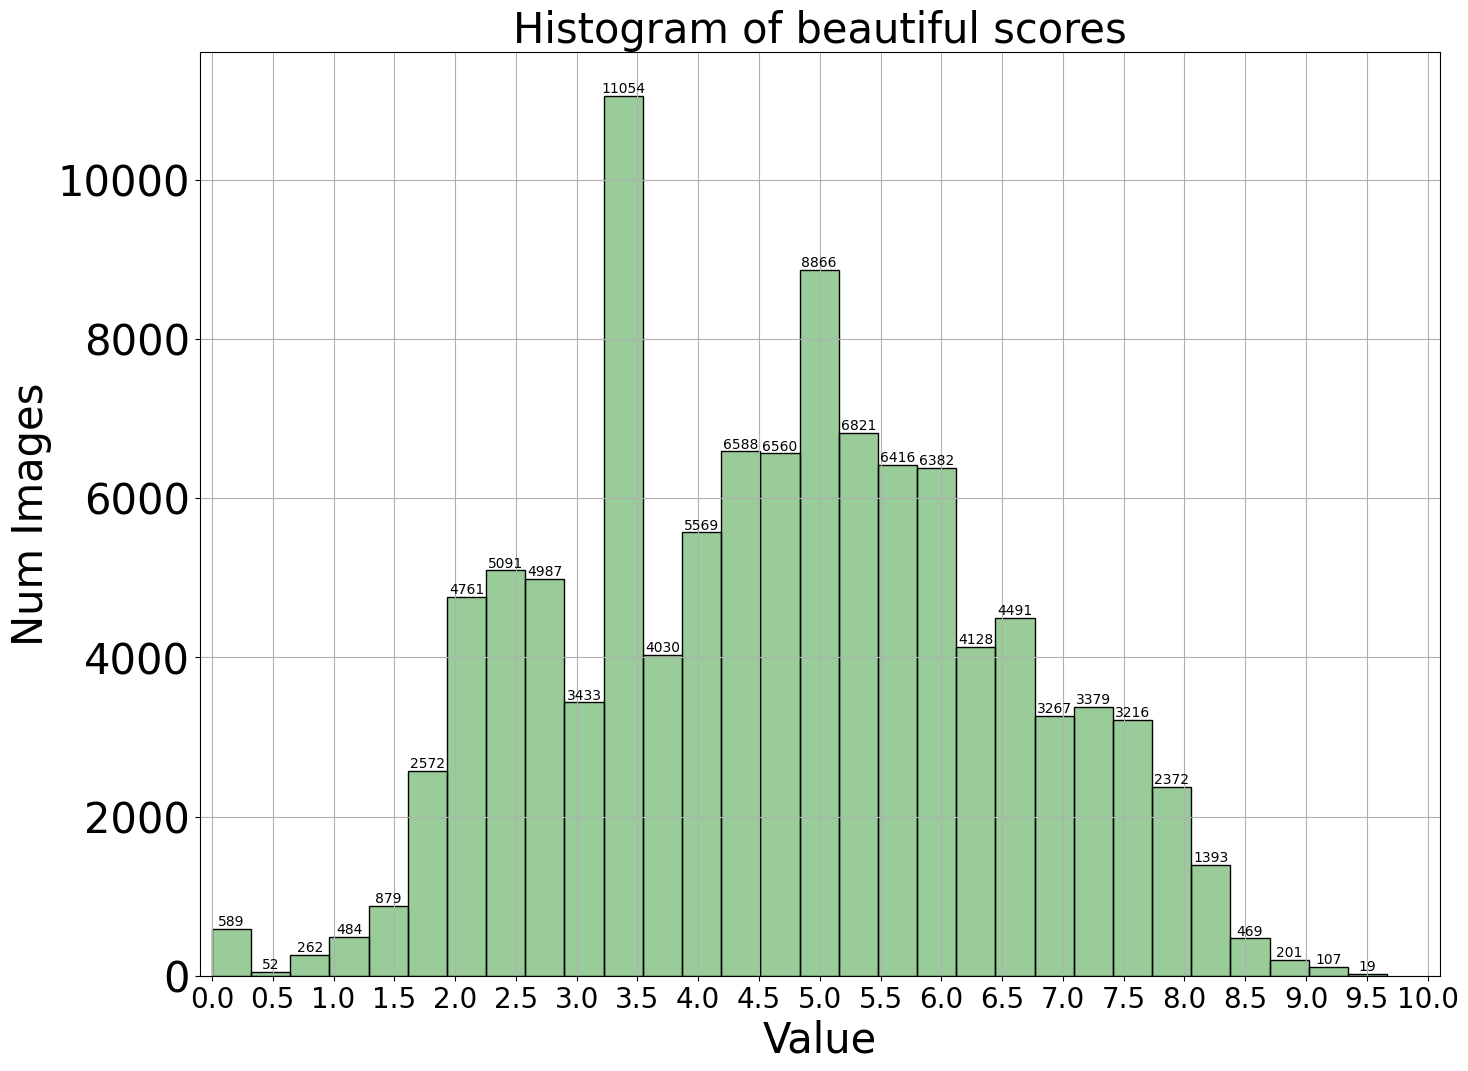

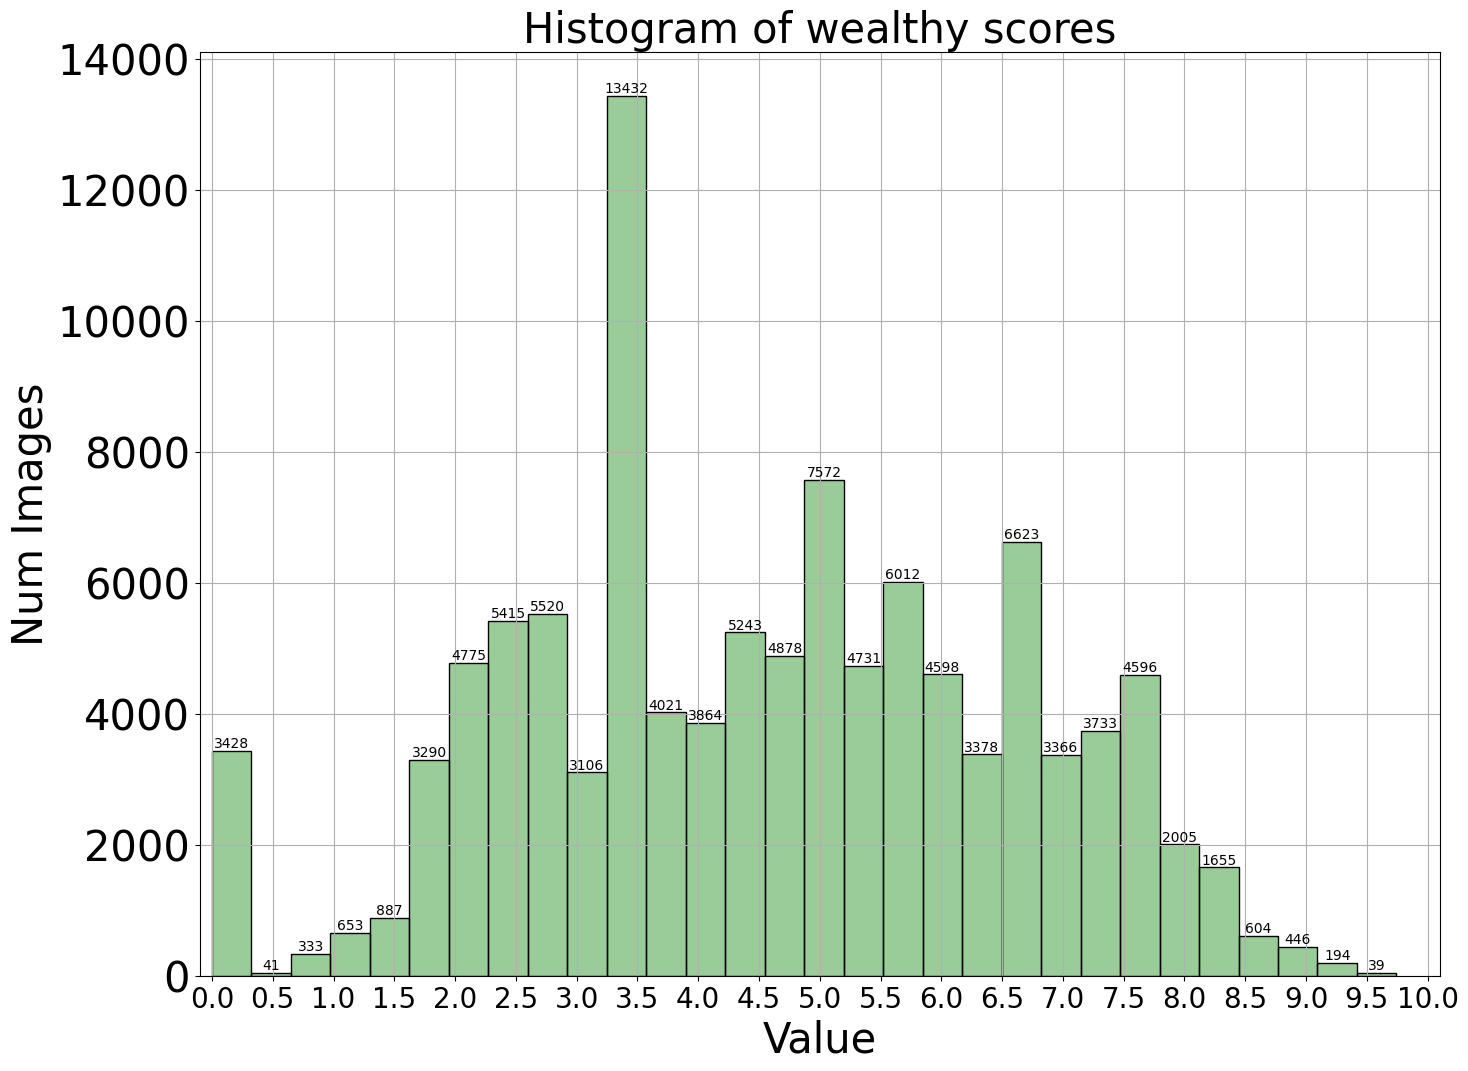

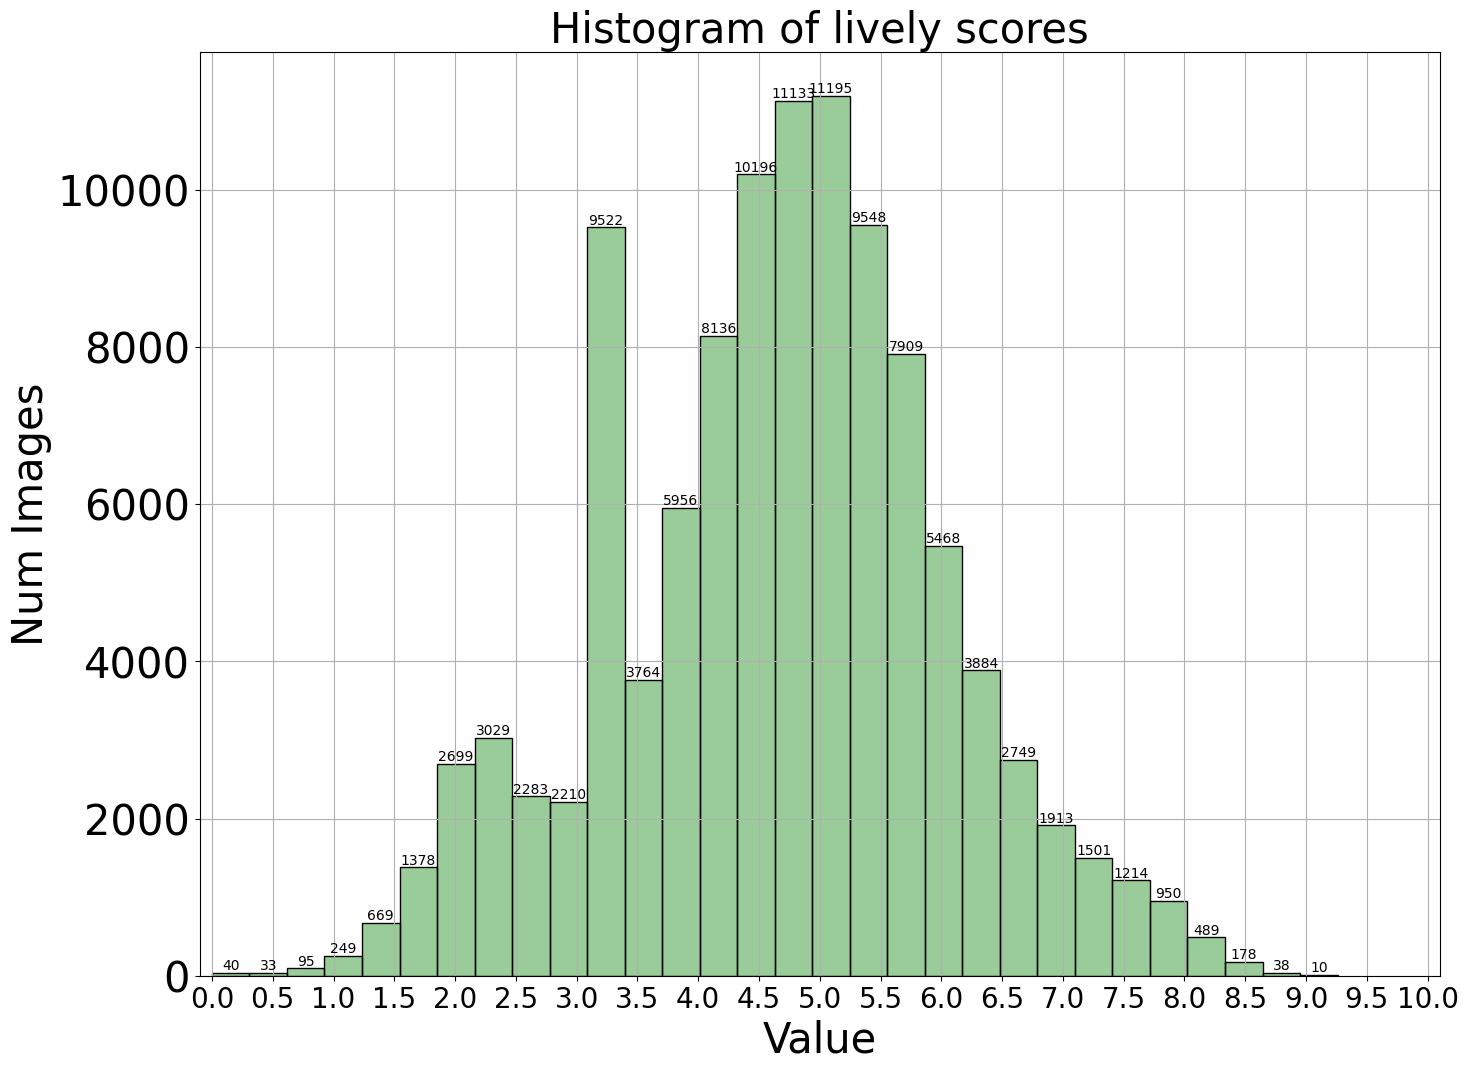

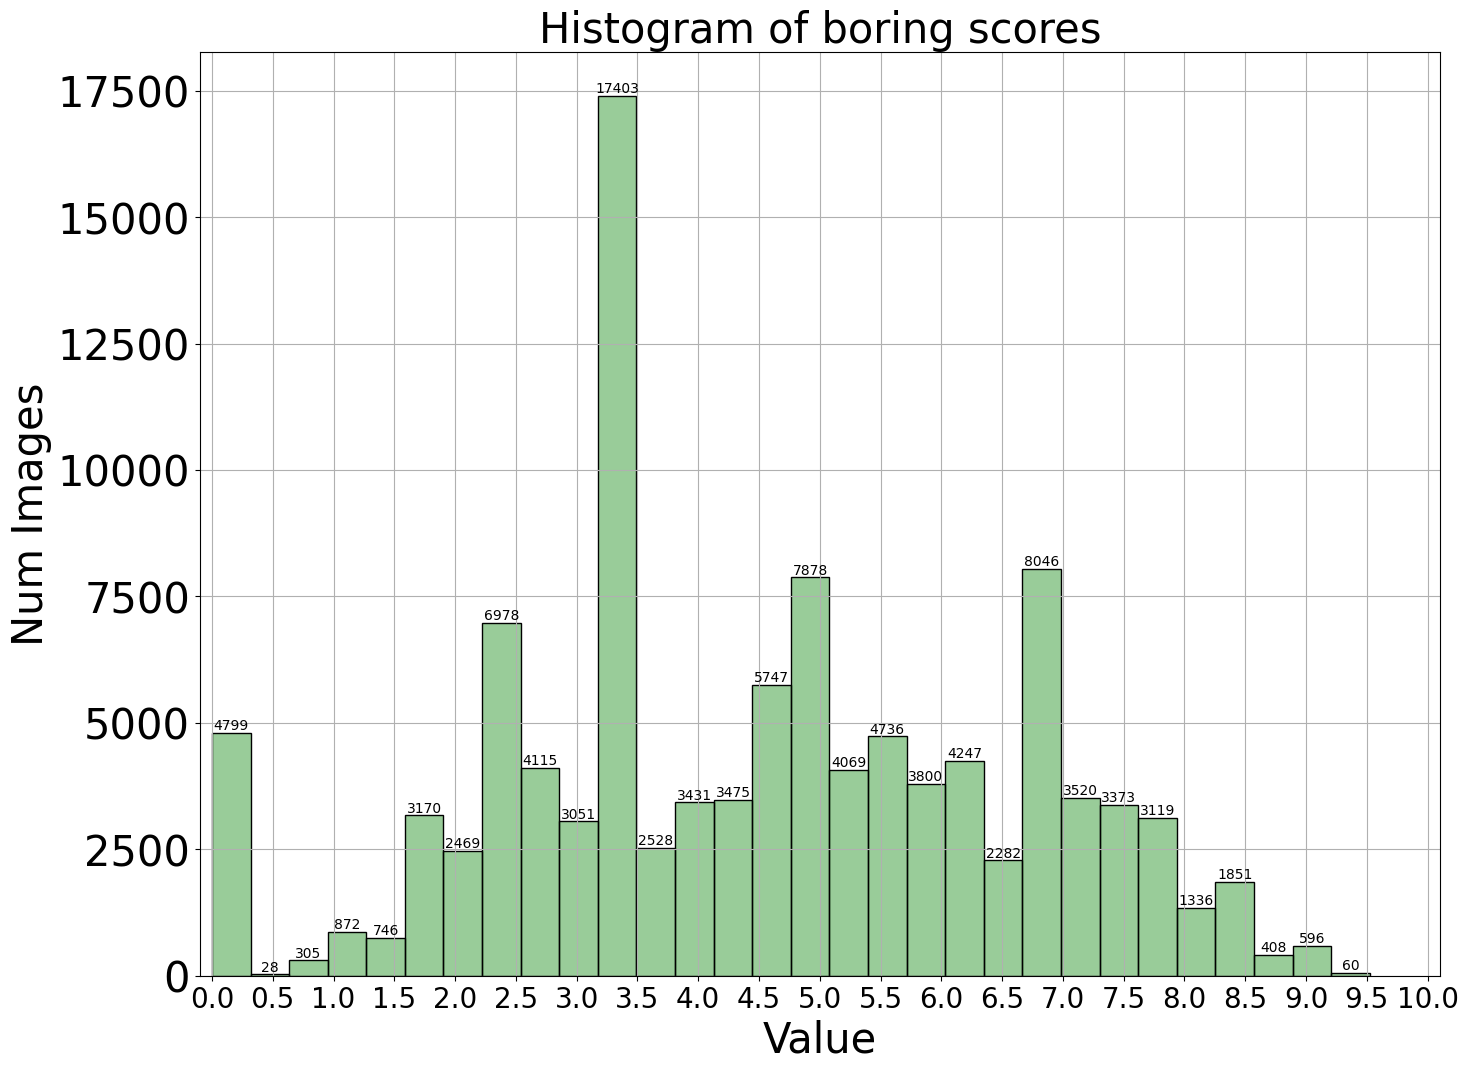

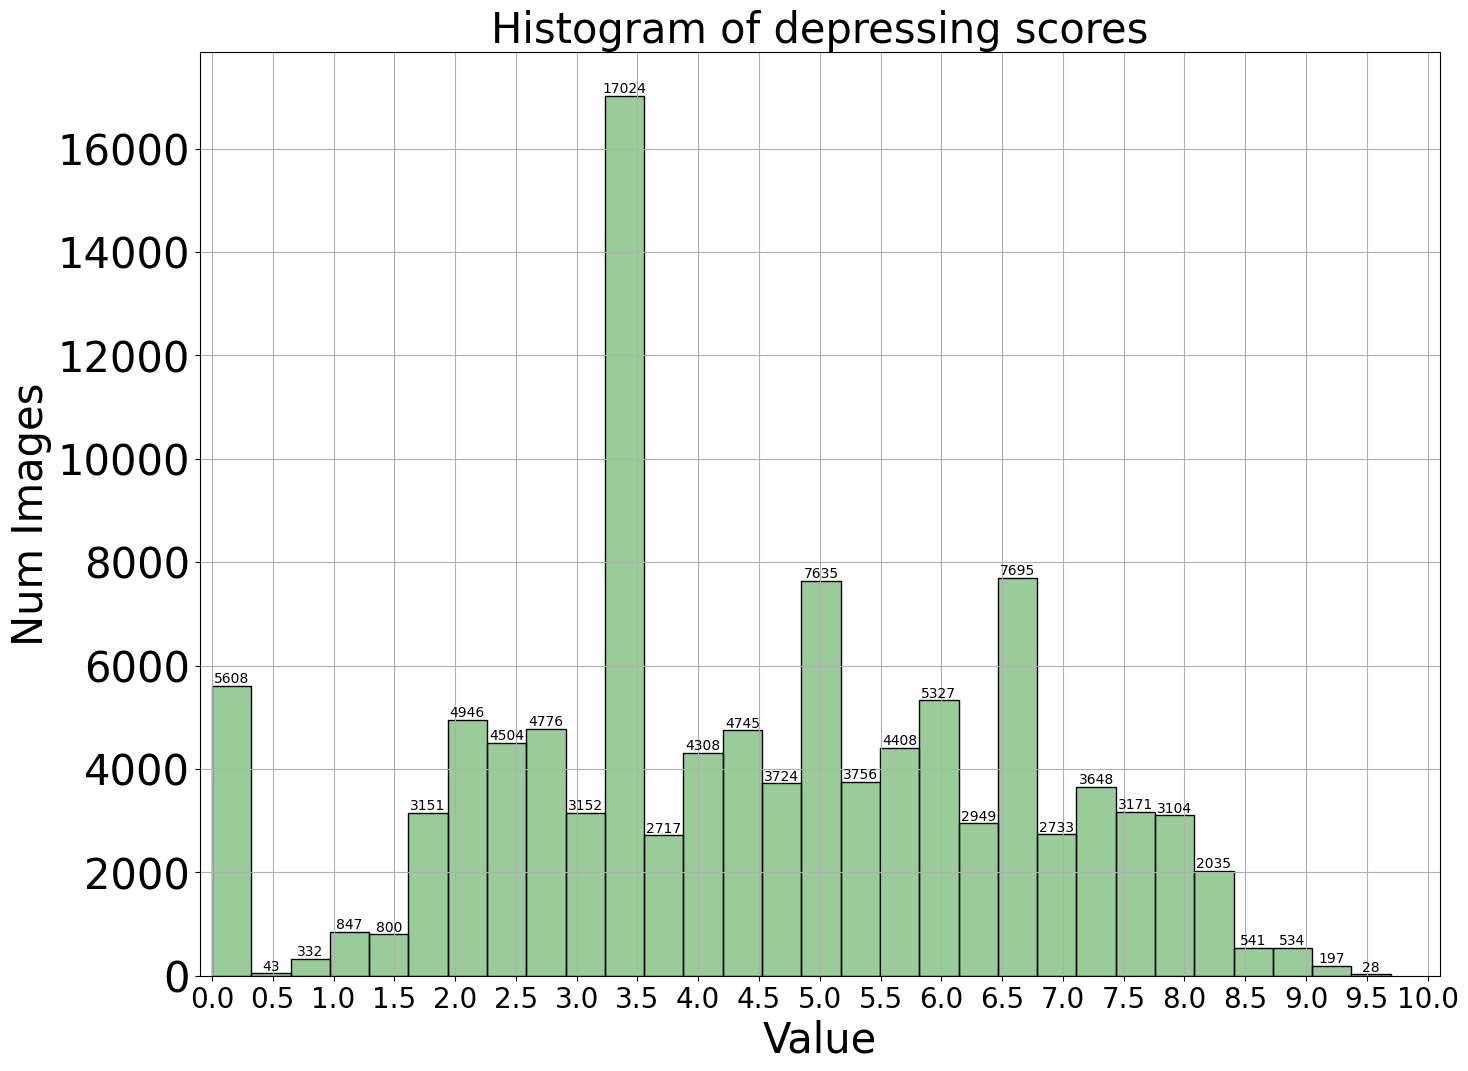

In [21]:
for metric in metrics:
    # verifyDir(f"{IMAGES_PATH}{metric}/")
    
    fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

    scores = data_df[metric].values

    sns_fig = sns.histplot(scores, 
                             bins=30, 
                             color='g', 
                             kde=False, 
                             label='City', 
                             ax=ax,
                             alpha=0.4)

    sns_fig.set_title(f"Histogram of {metric} scores", fontsize=30)
    sns_fig.set_ylabel('Num Images', fontsize=30)
    sns_fig.set_xlabel('Value', fontsize=30)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

    # rotate the axis ticklabels
    _ = sns_fig.tick_params(axis='y', labelsize=30)

    # add annotation
    _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

    # add a space on y for the annotations
    #sns_fig.margins(x=0.1)
    ax.grid(True)

    # plt.xlim(-0.1, 10.1)
    # plt.xticks(np.arange(0.0, 10.1, 0.5))

    # ax.legend(fontsize=40)
    # a,b = ax.get_xlim()
    xticks = np.arange(0.0, 10.1, 0.5)  # Adjust the range and step as needed
    sns_fig.set_xticks(xticks)
    ax.set_xlim(-0.1, 10.1)

    # # Display the plot
    # plt.legend()

    # fig.savefig(f'{IMAGES_PATH}/{metric}/score_distribution.png')
    plt.show()

### Score histogram per category and cities

In [22]:
for metric in metrics:
    verifyDir(f"{COMPARISONS_PATH}/{metric}/cities/")
    
    for current_city in data_df["city"].unique().tolist():
        city_df = data_df[data_df["city"]==current_city].copy()
        
        scores = city_df[metric].values
        
        fig, ax = plt.subplots(figsize=(16,12), nrows=1, ncols=1, sharex=False, sharey=False)

        sns_fig = sns.histplot(scores, 
                                 bins=30, 
                                 color='g', 
                                 kde=False, 
                                 label='City', 
                                 ax=ax,
                                 alpha=0.4)

        sns_fig.set_title(f"Histogram of {metric} scores in {current_city}", fontsize=30)
        sns_fig.set_ylabel('Num Images', fontsize=20)
        sns_fig.set_xlabel('Value', fontsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='x', rotation=0, labelsize=20)

        # rotate the axis ticklabels
        _ = sns_fig.tick_params(axis='y', labelsize=20)

        # add annotation
        _ = sns_fig.bar_label(sns_fig.containers[0], fmt='%0.0f', fontsize=10,rotation=0)

        # add a space on y for the annotations
        #sns_fig.margins(x=0.1)
        ax.grid(True)

        # plt.xlim(-0.1, 10.1)
        # plt.xticks(np.arange(0.0, 10.1, 0.5))

        # ax.legend(fontsize=40)
        # a,b = ax.get_xlim()
        xticks = np.arange(0.0, 10.1, 0.5)  # Adjust the range and step as needed
        sns_fig.set_xticks(xticks)
        ax.set_xlim(-0.1, 10.1)

        # # Display the plot
        # plt.legend()

        fig.savefig(f'{COMPARISONS_PATH}/{metric}/cities/{current_city}_score_histogram.png')
        # plt.show()
        plt.close(fig)